<a href="https://colab.research.google.com/github/san-rizz-777/Magic_Gamma_Telescope-ML_Classification/blob/main/Project_1_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

# Dataset :

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by: P. Savicky Institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

In [5]:
name = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fDist","class"]
df = pd.read_csv("magic04.data", names=name)
df["class"] = (df["class"] == "g").astype(int)
df.head()


fLength  fWidth   fSize   fConc    fConc1    fAsym  fM3Long  \
28.7967    16.0021  2.6449  0.3918  0.1982   27.7004  22.0110  -8.2027   
31.6036    11.7235  2.5185  0.5303  0.3773   26.2722  23.8238  -9.9574   
162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580 -45.2160   
23.8172     9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633  -7.1513   
75.1362    30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525  21.8393   

          fM3Trans     fDist  class  
28.7967    40.0920   81.8828      1  
31.6036     6.3609  205.2610      1  
162.0520   76.9600  256.7880      1  
23.8172    10.4490  116.7370      1  
75.1362     4.6480  356.4620      1

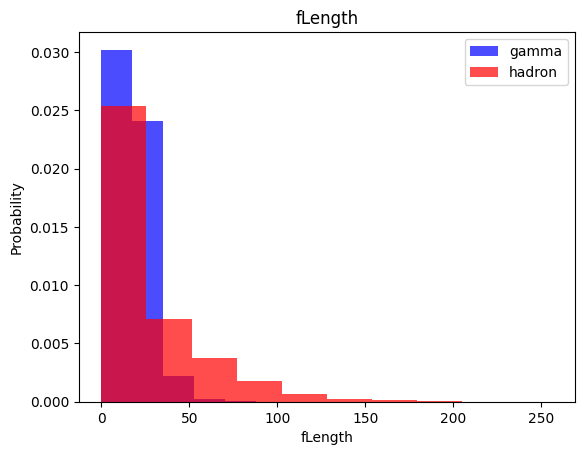

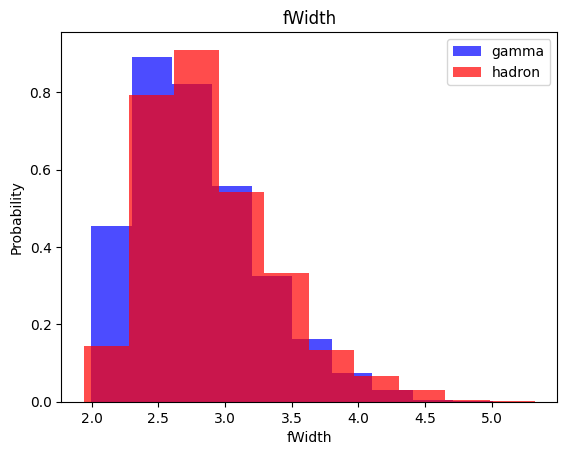

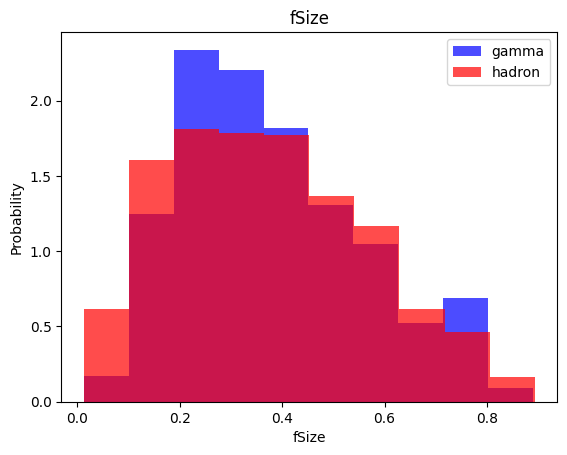

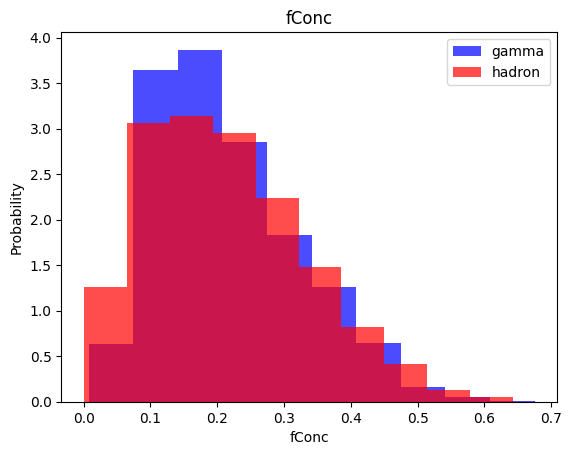

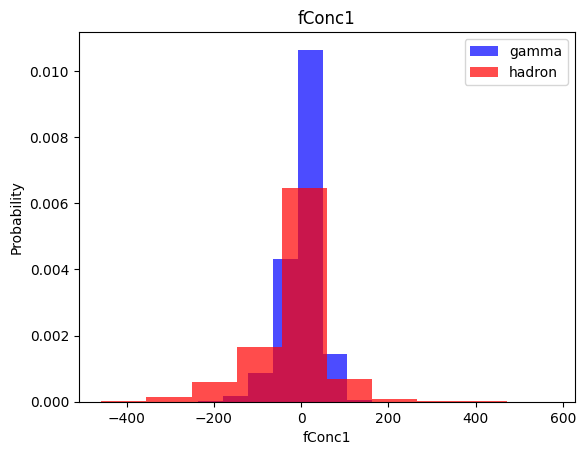

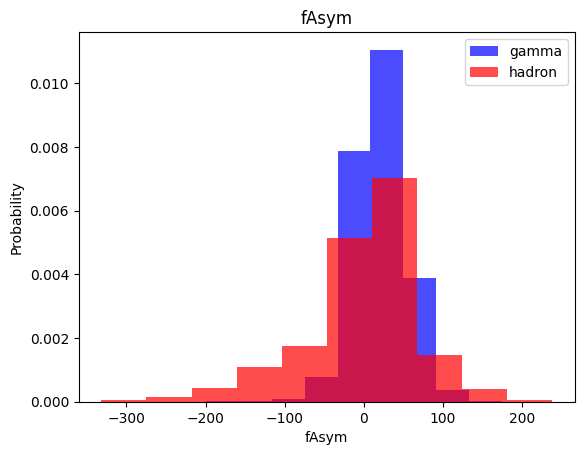

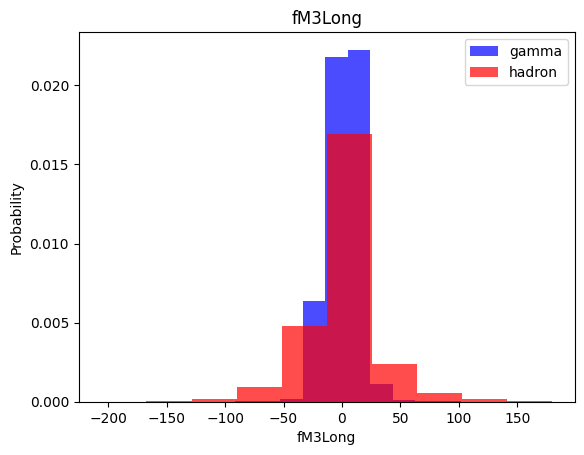

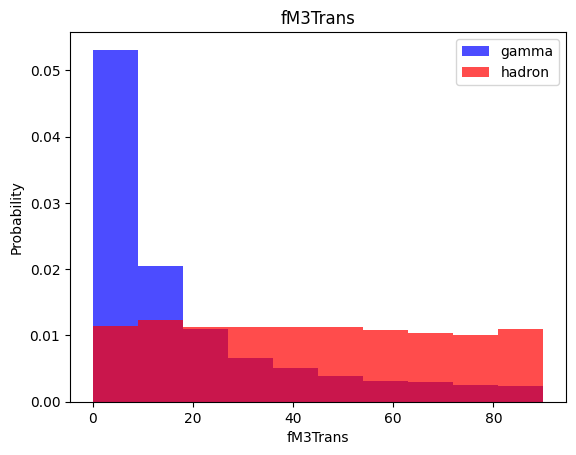

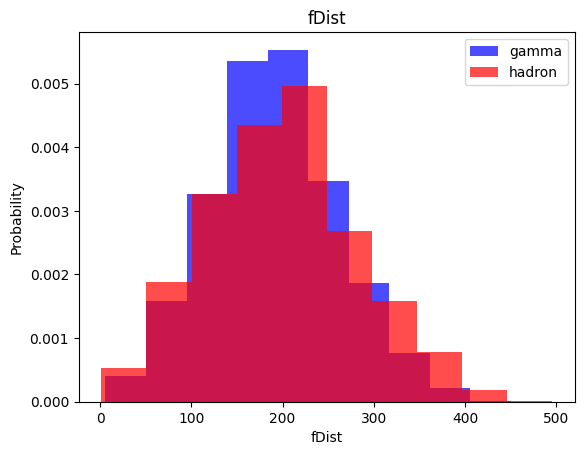

In [6]:
for label in name[:-1]:  # skip "class"
    plt.hist(df[df["class"] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()


- Train,validate and test data sets

In [7]:
# Shuffle the DataFrame
df = shuffle(df, random_state=42).reset_index(drop=True)

# Compute split indices
train_end = int(0.6 * len(df))
valid_end = int(0.8 * len(df))


# Perform split
train, valid, test = np.split(df, [train_end, valid_end])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
def scale_dataset(dataframe, oversample=False):
    # Separate features and label
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    # Scale features
    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    #  oversampling to balance classes
    if oversample:
        r = RandomOverSampler()
        x, y = r.fit_resample(x, y)

    # Reshape and combine for unified dataset
    data = np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x, y

In [9]:
train,x_train,y_train = scale_dataset(train, oversample=True)
valid,x_valid,y_valid = scale_dataset(valid, oversample=False)
test,x_test,y_test  = scale_dataset(test, oversample=False)

#kNN Implementation


In [10]:
from sklearn.neighbors import KNeighborsClassifier

Training the model

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Predicting the outcome

In [12]:
y_pred = knn_model.predict(x_test)

Classification report(accuracy,precision,recall,f1score)

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1331
           1       0.85      0.83      0.84      2473

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



#Naive-Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)


GaussianNB()

In [16]:
y_pred = nb_model.predict(x_test)


In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.45      0.53      1331
           1       0.75      0.88      0.81      2473

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



#Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred = lg_model.predict(x_test)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1331
           1       0.83      0.81      0.82      2473

    accuracy                           0.77      3804
   macro avg       0.75      0.75      0.75      3804
weighted avg       0.77      0.77      0.77      3804



#Support Vector Machines(SVM)

In [22]:
from sklearn.svm import SVC

In [23]:
svm_model  = SVC()
svm_model.fit(x_train,y_train)

SVC()

In [24]:
y_pred = svm_model.predict(x_test)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1331
           1       0.88      0.88      0.88      2473

    accuracy                           0.85      3804
   macro avg       0.83      0.83      0.83      3804
weighted avg       0.85      0.85      0.85      3804



#Neural Network

In [26]:
import tensorflow as tf

Plot defination

In [27]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy loss')
  ax1.legend()
  ax1.grid(True)


  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)

  plt.show()

Developing and training the model

In [29]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(9,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
                              ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

  return nn_model, history

Figuring out least value loss and best model

Training model with 16 nodes, dropout=0, learning rate=0.01, batch size=32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7976 - loss: 0.4355 - val_accuracy: 0.6960 - val_loss: 0.6273
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8387 - loss: 0.3672 - val_accuracy: 0.6856 - val_loss: 0.6135
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8477 - loss: 0.3518 - val_accuracy: 0.7220 - val_loss: 0.5095
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8586 - loss: 0.3394 - val_accuracy: 0.7588 - val_loss: 0.4676
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8518 - loss: 0.3415 - val_accuracy: 0.6977 - val_loss: 0.6169
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8533 - loss: 0.3328 - val_accuracy: 0.6808 - val_loss: 0.5823
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8567 - loss: 0.3333 - val_accuracy: 0.7740 - val_loss: 0.4463
Epoch 8/100
371/371 ━━

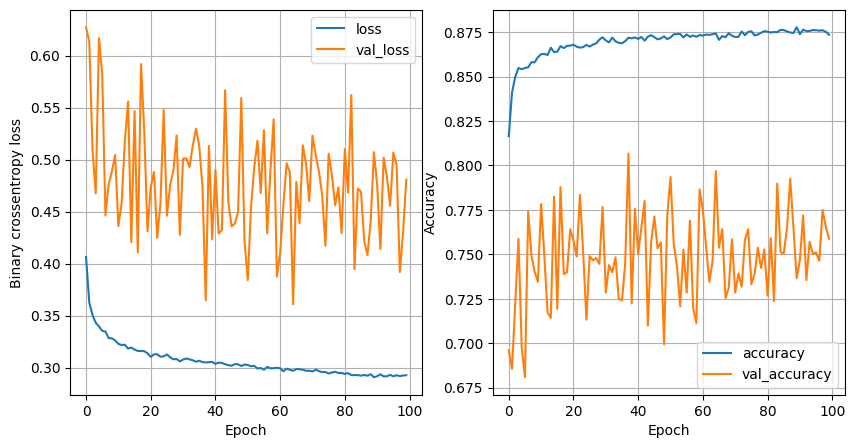

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8640 - loss: 0.3323
Training model with 16 nodes, dropout=0, learning rate=0.01, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7634 - loss: 0.4947 - val_accuracy: 0.6906 - val_loss: 0.6184
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8287 - loss: 0.3834 - val_accuracy: 0.7001 - val_loss: 0.5853
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8480 - loss: 0.3475 - val_accuracy: 0.7038 - val_loss: 0.5833
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8452 - loss: 0.3488 - val_accuracy: 0.7338 - val_loss: 0.5084
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8568 - loss: 0.3253 - val_accuracy: 0.7244 - val_loss: 0.5300
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8562 - loss: 0.3371 - val_accuracy: 0.7392 - val_loss: 0.4902
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8612 - lo

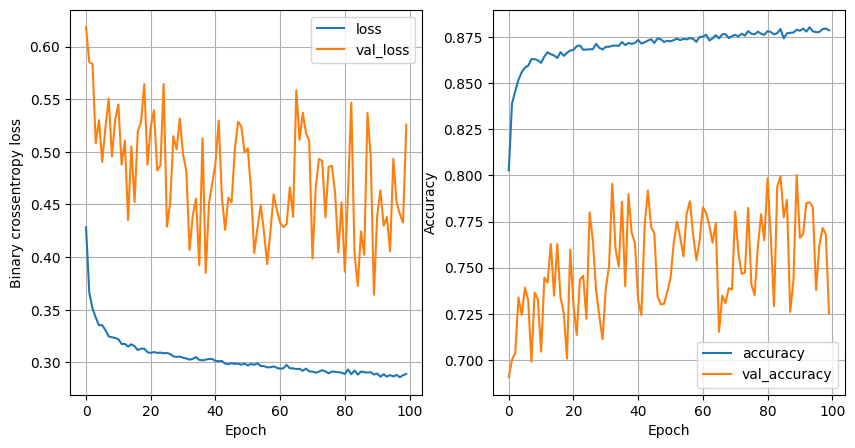

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8703 - loss: 0.3286
Training model with 16 nodes, dropout=0, learning rate=0.01, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7467 - loss: 0.5043 - val_accuracy: 0.6991 - val_loss: 0.5941
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8412 - loss: 0.3661 - val_accuracy: 0.6933 - val_loss: 0.5949
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8499 - loss: 0.3576 - val_accuracy: 0.6953 - val_loss: 0.5661
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8571 - loss: 0.3466 - val_accuracy: 0.7041 - val_loss: 0.5459
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8459 - loss: 0.3503 - val_accuracy: 0.7223 - val_loss: 0.5268
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8548 - loss: 0.3437 - val_accuracy: 0.7126 - val_loss: 0.5554
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8644 - loss: 0.3275 - 

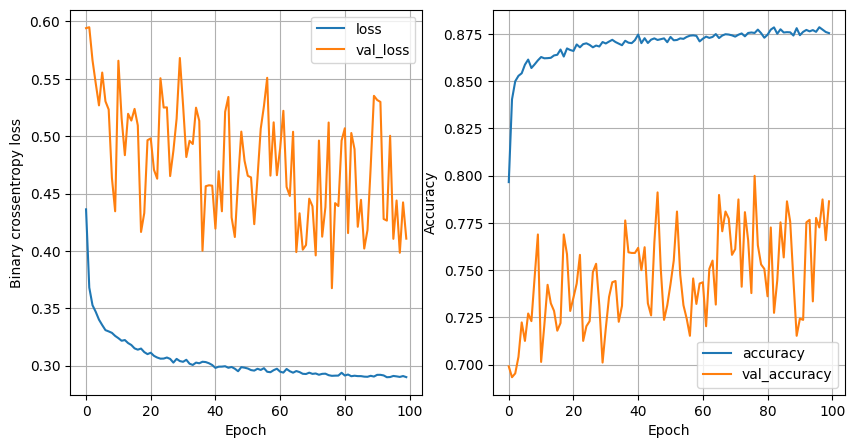

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8659 - loss: 0.3145
Training model with 16 nodes, dropout=0, learning rate=0.005, batch size=32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7901 - loss: 0.4596 - val_accuracy: 0.6883 - val_loss: 0.6468
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8374 - loss: 0.3721 - val_accuracy: 0.7274 - val_loss: 0.5279
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8454 - loss: 0.3534 - val_accuracy: 0.6997 - val_loss: 0.5890
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8505 - loss: 0.3464 - val_accuracy: 0.6845 - val_loss: 0.5829
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8520 - loss: 0.3407 - val_accuracy: 0.7146 - val_loss: 0.5119
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8587 - loss: 0.3297 - val_accuracy: 0.6667 - val_loss: 0.6449
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8515 - l

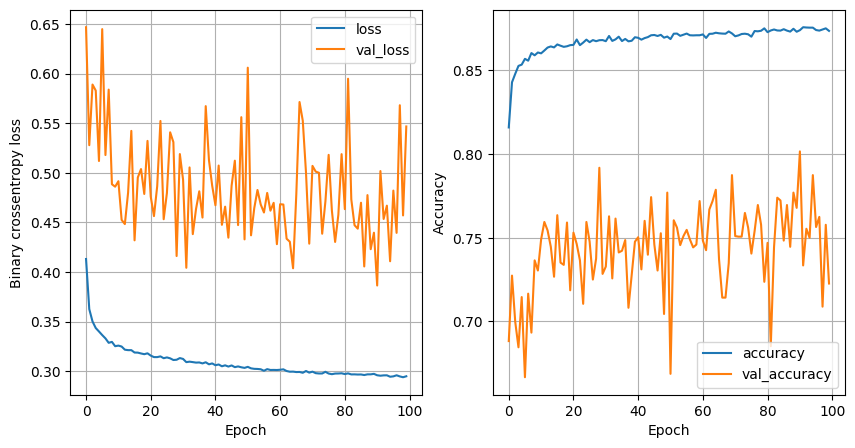

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8709 - loss: 0.3200
Training model with 16 nodes, dropout=0, learning rate=0.005, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7663 - loss: 0.4860 - val_accuracy: 0.7628 - val_loss: 0.4987
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8451 - loss: 0.3648 - val_accuracy: 0.7227 - val_loss: 0.5490
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8517 - loss: 0.3562 - val_accuracy: 0.7611 - val_loss: 0.4790
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8473 - loss: 0.3484 - val_accuracy: 0.7244 - val_loss: 0.5343
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8546 - loss: 0.3347 - val_accuracy: 0.7308 - val_loss: 0.5077
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8586 - loss: 0.3319 - val_accuracy: 0.7294 - val_loss: 0.5061
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8553 - l

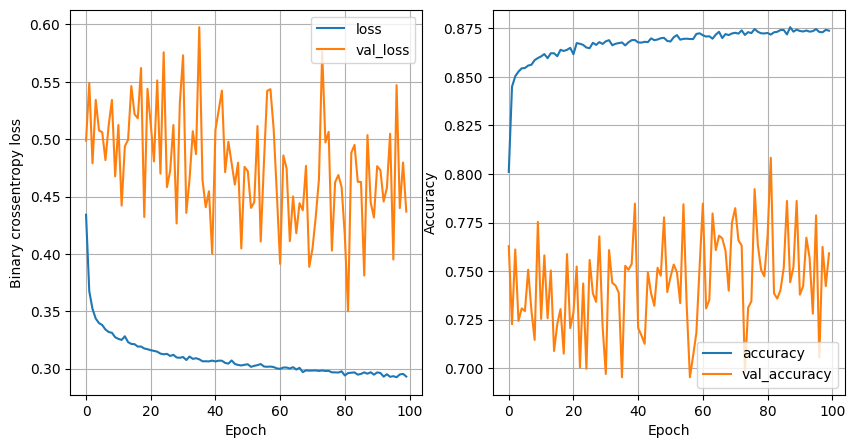

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8686 - loss: 0.3169
Training model with 16 nodes, dropout=0, learning rate=0.005, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7030 - loss: 0.5548 - val_accuracy: 0.6147 - val_loss: 0.6210
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8161 - loss: 0.4087 - val_accuracy: 0.6474 - val_loss: 0.6910
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8359 - loss: 0.3726 - val_accuracy: 0.6994 - val_loss: 0.6054
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8433 - loss: 0.3656 - val_accuracy: 0.7318 - val_loss: 0.5306
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8524 - loss: 0.3453 - val_accuracy: 0.7706 - val_loss: 0.4515
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8472 - loss: 0.3504 - val_accuracy: 0.7156 - val_loss: 0.5575
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8461 - loss: 0.3534 -

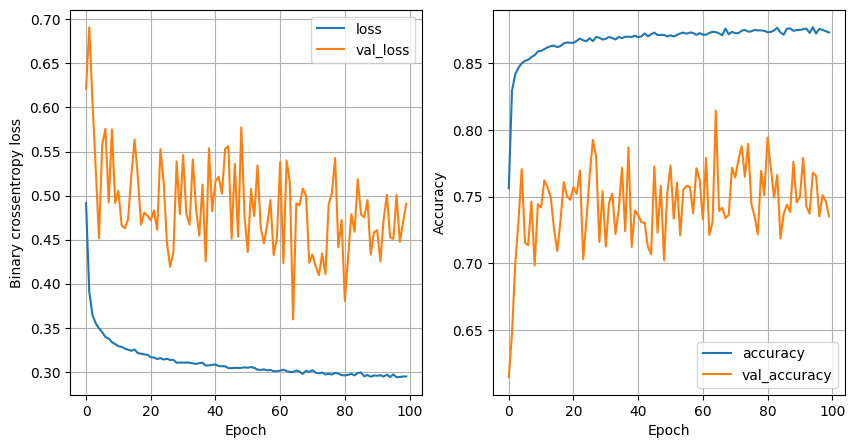

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.3263
Training model with 16 nodes, dropout=0, learning rate=0.001, batch size=32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7169 - loss: 0.5796 - val_accuracy: 0.6191 - val_loss: 0.7023
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8152 - loss: 0.4158 - val_accuracy: 0.6727 - val_loss: 0.6200
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8263 - loss: 0.3941 - val_accuracy: 0.7264 - val_loss: 0.5374
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8367 - loss: 0.3730 - val_accuracy: 0.6974 - val_loss: 0.5992
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8392 - loss: 0.3655 - val_accuracy: 0.7058 - val_loss: 0.5848
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8424 - loss: 0.3590 - val_accuracy: 0.7311 - val_loss: 0.5305
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8450 - l

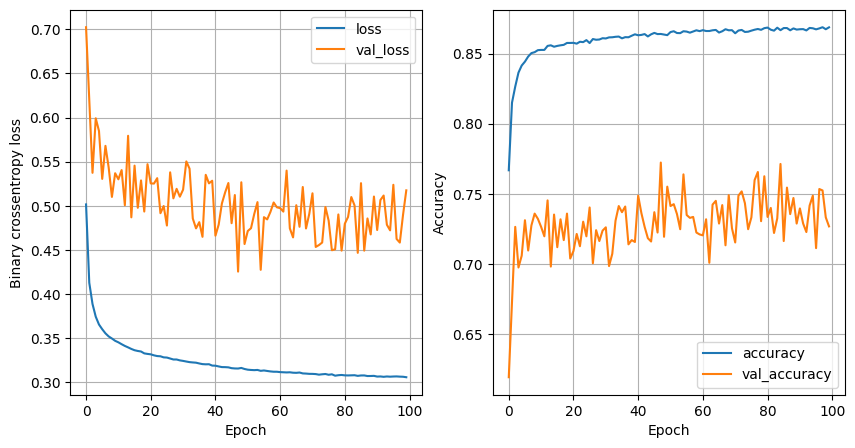

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.3221
Training model with 16 nodes, dropout=0, learning rate=0.001, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6750 - loss: 0.6094 - val_accuracy: 0.5884 - val_loss: 0.7065
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7897 - loss: 0.4549 - val_accuracy: 0.6495 - val_loss: 0.6303
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8072 - loss: 0.4255 - val_accuracy: 0.6832 - val_loss: 0.5937
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8270 - loss: 0.3998 - val_accuracy: 0.6741 - val_loss: 0.6157
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8406 - loss: 0.3736 - val_accuracy: 0.7200 - val_loss: 0.5433
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8390 - loss: 0.3777 - val_accuracy: 0.7102 - val_loss: 0.5720
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8410 - l

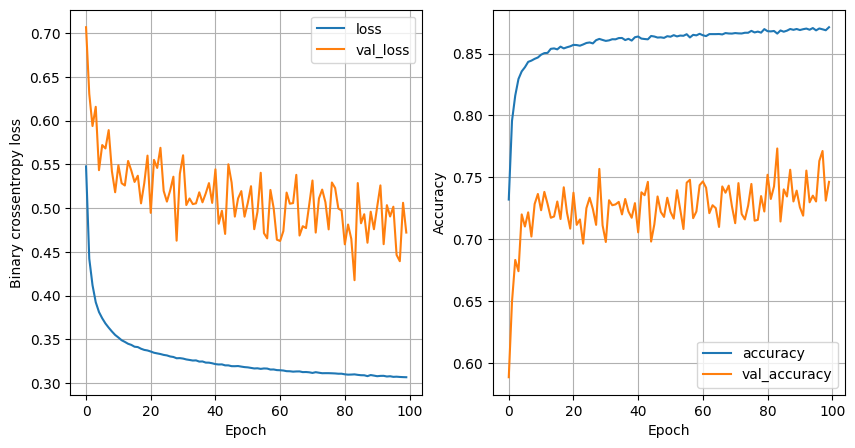

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8694 - loss: 0.3189
Training model with 16 nodes, dropout=0, learning rate=0.001, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6410 - loss: 0.6409 - val_accuracy: 0.5091 - val_loss: 0.7573
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7537 - loss: 0.5129 - val_accuracy: 0.6049 - val_loss: 0.6784
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7825 - loss: 0.4500 - val_accuracy: 0.6218 - val_loss: 0.6626
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7959 - loss: 0.4274 - val_accuracy: 0.6377 - val_loss: 0.6296
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8105 - loss: 0.4153 - val_accuracy: 0.6569 - val_loss: 0.6262
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8207 - loss: 0.4002 - val_accuracy: 0.6680 - val_loss: 0.6335
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8277 - loss: 0.3918 -

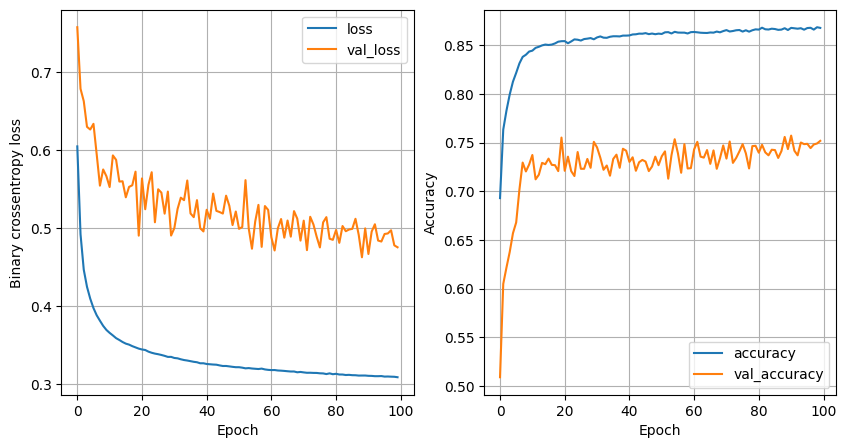

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8697 - loss: 0.3103
Training model with 16 nodes, dropout=0.2, learning rate=0.01, batch size=32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7584 - loss: 0.4904 - val_accuracy: 0.6434 - val_loss: 0.6394
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8323 - loss: 0.3839 - val_accuracy: 0.7466 - val_loss: 0.4814
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8368 - loss: 0.3794 - val_accuracy: 0.6690 - val_loss: 0.6010
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8377 - loss: 0.3715 - val_accuracy: 0.7166 - val_loss: 0.5140
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8486 - loss: 0.3584 - val_accuracy: 0.6788 - val_loss: 0.6039
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8430 - loss: 0.3551 - val_accuracy: 0.7149 - val_loss: 0.5274
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8440 - 

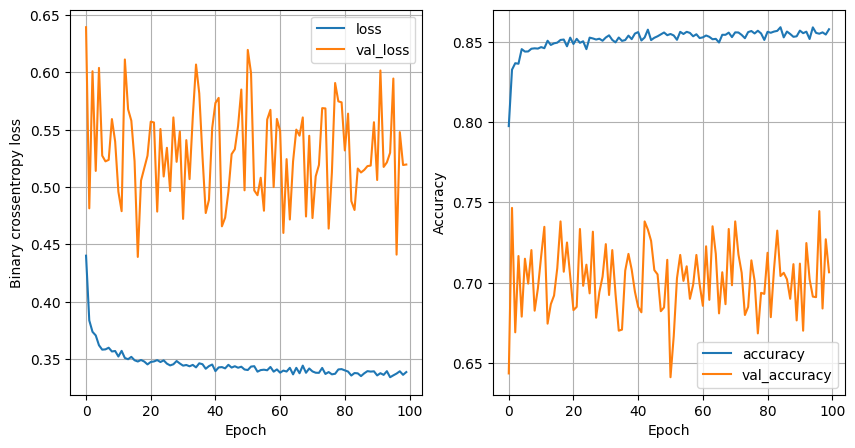

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.3217
Training model with 16 nodes, dropout=0.2, learning rate=0.01, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7444 - loss: 0.5371 - val_accuracy: 0.6849 - val_loss: 0.6004
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8251 - loss: 0.4053 - val_accuracy: 0.7267 - val_loss: 0.5312
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8318 - loss: 0.3842 - val_accuracy: 0.7429 - val_loss: 0.4997
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8427 - loss: 0.3693 - val_accuracy: 0.7625 - val_loss: 0.4340
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8434 - loss: 0.3632 - val_accuracy: 0.7149 - val_loss: 0.5193
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8429 - loss: 0.3664 - val_accuracy: 0.7331 - val_loss: 0.5039
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8489 - 

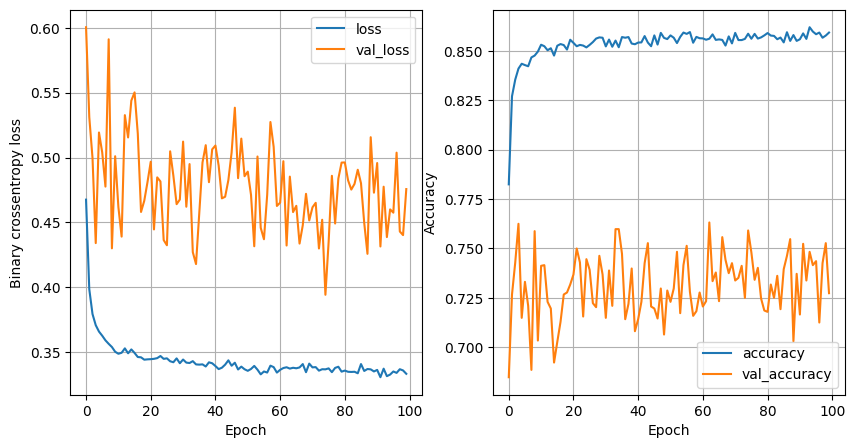

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8679 - loss: 0.3269
Training model with 16 nodes, dropout=0.2, learning rate=0.01, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7435 - loss: 0.5209 - val_accuracy: 0.6579 - val_loss: 0.6508
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8165 - loss: 0.4103 - val_accuracy: 0.7011 - val_loss: 0.5375
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8353 - loss: 0.3789 - val_accuracy: 0.7156 - val_loss: 0.5348
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8330 - loss: 0.3846 - val_accuracy: 0.7416 - val_loss: 0.4852
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8452 - loss: 0.3558 - val_accuracy: 0.7483 - val_loss: 0.4644
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8424 - loss: 0.3621 - val_accuracy: 0.7146 - val_loss: 0.5384
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8479 - loss: 0.3554 

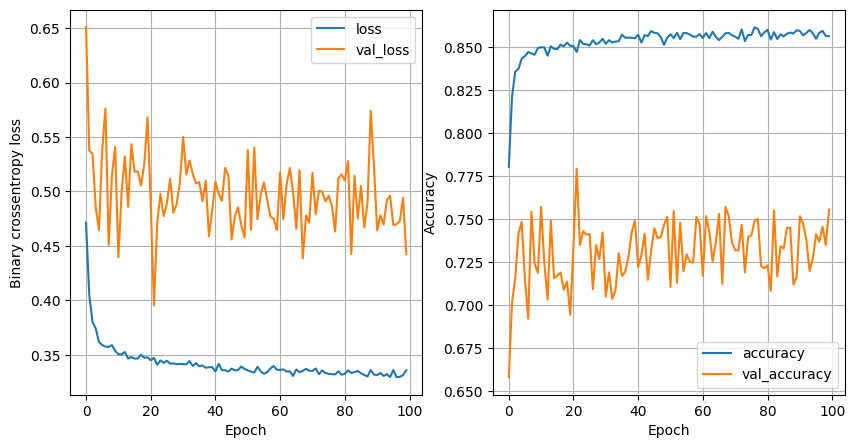

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8672 - loss: 0.3253
Training model with 16 nodes, dropout=0.2, learning rate=0.005, batch size=32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7486 - loss: 0.5142 - val_accuracy: 0.6596 - val_loss: 0.6710
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8207 - loss: 0.4102 - val_accuracy: 0.6582 - val_loss: 0.6316
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8325 - loss: 0.3827 - val_accuracy: 0.6903 - val_loss: 0.5934
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8388 - loss: 0.3773 - val_accuracy: 0.6667 - val_loss: 0.6040
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8384 - loss: 0.3689 - val_accuracy: 0.7048 - val_loss: 0.5235
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8437 - loss: 0.3643 - val_accuracy: 0.7385 - val_loss: 0.4653
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8416 -

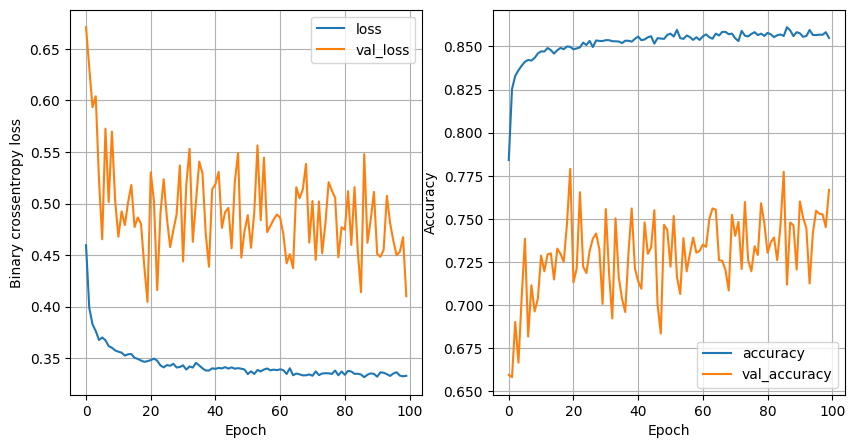

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8595 - loss: 0.3385
Training model with 16 nodes, dropout=0.2, learning rate=0.005, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7038 - loss: 0.5545 - val_accuracy: 0.6306 - val_loss: 0.6507
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8116 - loss: 0.4219 - val_accuracy: 0.6987 - val_loss: 0.5904
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8155 - loss: 0.4094 - val_accuracy: 0.6738 - val_loss: 0.6431
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8302 - loss: 0.3867 - val_accuracy: 0.7233 - val_loss: 0.5420
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8314 - loss: 0.3763 - val_accuracy: 0.6603 - val_loss: 0.6401
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8408 - loss: 0.3691 - val_accuracy: 0.6633 - val_loss: 0.6220
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8356 -

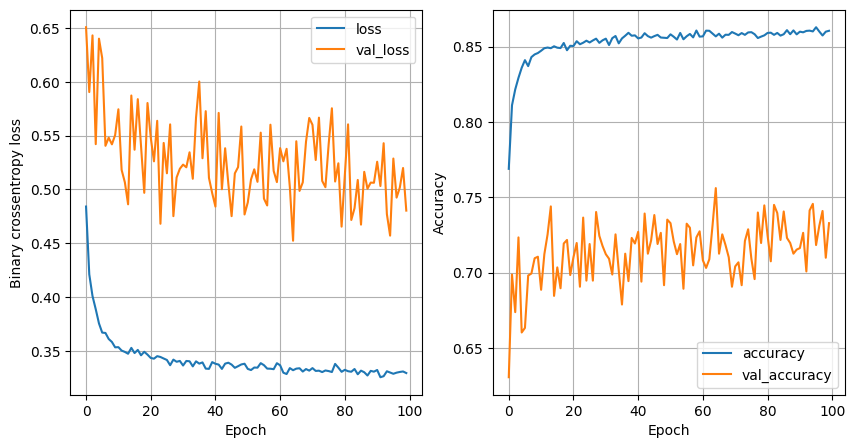

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8741 - loss: 0.3132
Training model with 16 nodes, dropout=0.2, learning rate=0.005, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7070 - loss: 0.5765 - val_accuracy: 0.6751 - val_loss: 0.5752
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8083 - loss: 0.4231 - val_accuracy: 0.6906 - val_loss: 0.5718
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8223 - loss: 0.4039 - val_accuracy: 0.7210 - val_loss: 0.5294
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8325 - loss: 0.3805 - val_accuracy: 0.6980 - val_loss: 0.5794
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8356 - loss: 0.3755 - val_accuracy: 0.7139 - val_loss: 0.5385
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8423 - loss: 0.3665 - val_accuracy: 0.7240 - val_loss: 0.5119
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8414 - loss: 0.3667

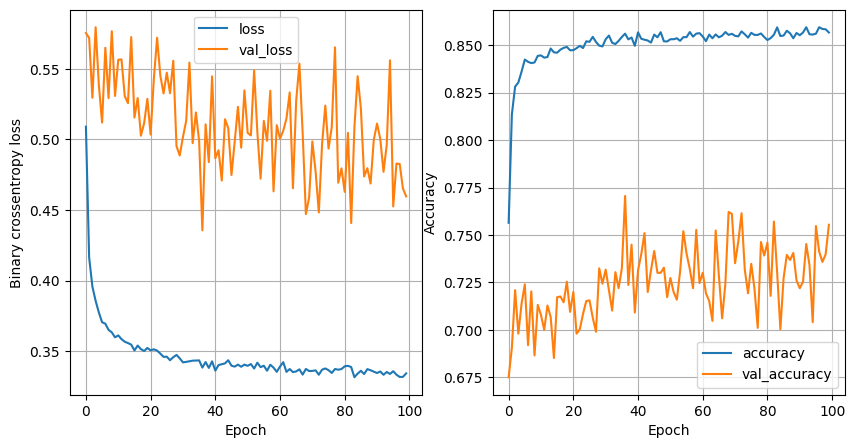

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8757 - loss: 0.3169
Training model with 16 nodes, dropout=0.2, learning rate=0.001, batch size=32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6484 - loss: 0.6118 - val_accuracy: 0.6022 - val_loss: 0.7052
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7916 - loss: 0.4516 - val_accuracy: 0.6879 - val_loss: 0.5885
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8063 - loss: 0.4274 - val_accuracy: 0.6822 - val_loss: 0.5968
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8138 - loss: 0.4156 - val_accuracy: 0.6808 - val_loss: 0.6093
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8225 - loss: 0.3998 - val_accuracy: 0.6741 - val_loss: 0.6231
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8288 - loss: 0.3954 - val_accuracy: 0.6923 - val_loss: 0.5744
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8330 -

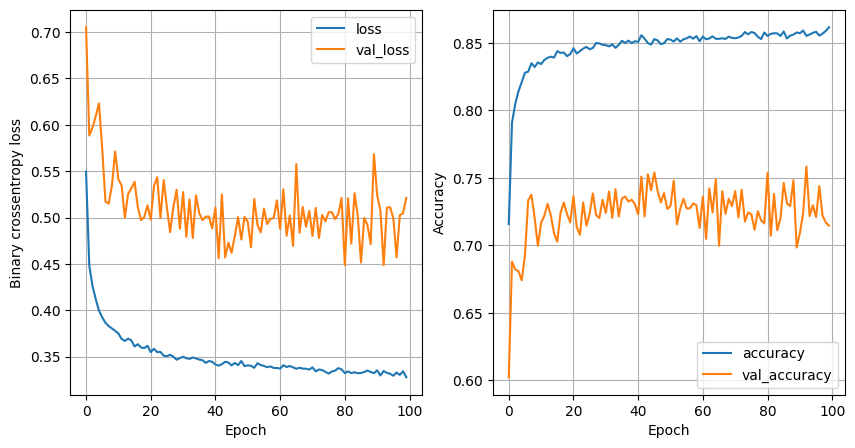

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8691 - loss: 0.3168
Training model with 16 nodes, dropout=0.2, learning rate=0.001, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5469 - loss: 0.6874 - val_accuracy: 0.5024 - val_loss: 0.7558
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7597 - loss: 0.4945 - val_accuracy: 0.5857 - val_loss: 0.7366
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7898 - loss: 0.4510 - val_accuracy: 0.6518 - val_loss: 0.6585
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8018 - loss: 0.4340 - val_accuracy: 0.6586 - val_loss: 0.6251
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8023 - loss: 0.4275 - val_accuracy: 0.6940 - val_loss: 0.5936
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8151 - loss: 0.4095 - val_accuracy: 0.6980 - val_loss: 0.5820
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8152 -

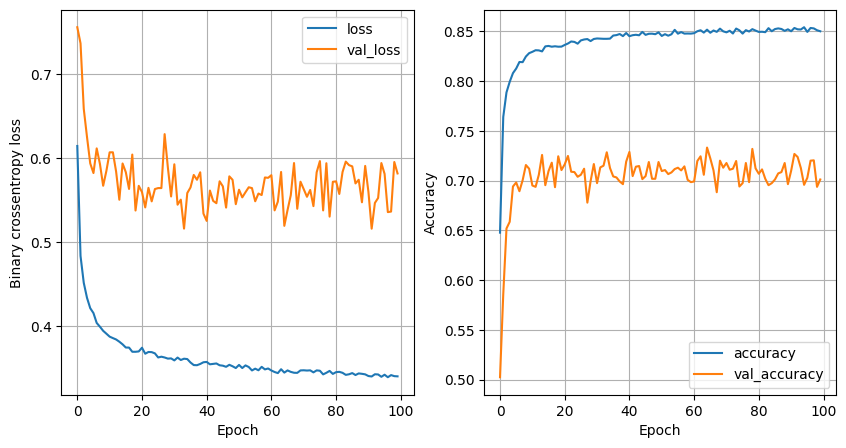

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8639 - loss: 0.3206
Training model with 16 nodes, dropout=0.2, learning rate=0.001, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6506 - loss: 0.6665 - val_accuracy: 0.5982 - val_loss: 0.7053
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7650 - loss: 0.5171 - val_accuracy: 0.6252 - val_loss: 0.6543
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7757 - loss: 0.4824 - val_accuracy: 0.6387 - val_loss: 0.6419
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7865 - loss: 0.4593 - val_accuracy: 0.6404 - val_loss: 0.6218
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7905 - loss: 0.4491 - val_accuracy: 0.6312 - val_loss: 0.6310
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7998 - loss: 0.4385 - val_accuracy: 0.6343 - val_loss: 0.6210
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7935 - loss: 0.4388

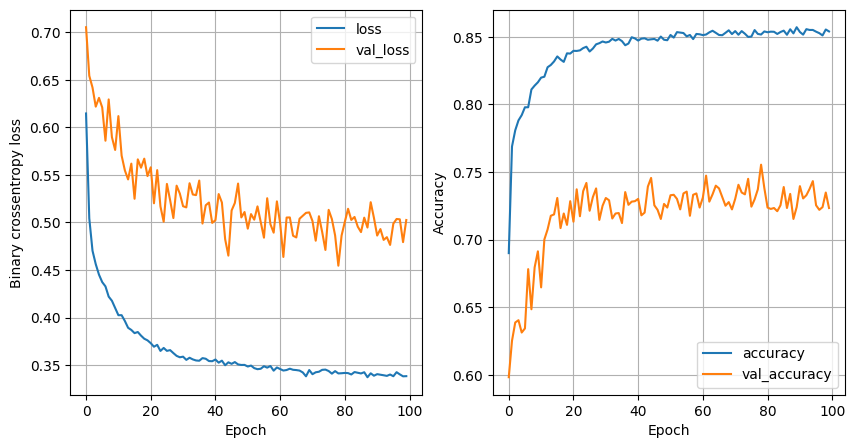

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8749 - loss: 0.3103
Training model with 32 nodes, dropout=0, learning rate=0.01, batch size=32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7930 - loss: 0.4354 - val_accuracy: 0.6704 - val_loss: 0.6548
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8493 - loss: 0.3489 - val_accuracy: 0.7453 - val_loss: 0.4882
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8508 - loss: 0.3468 - val_accuracy: 0.6940 - val_loss: 0.5784
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8548 - loss: 0.3376 - val_accuracy: 0.7321 - val_loss: 0.5297
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8532 - loss: 0.3400 - val_accuracy: 0.7072 - val_loss: 0.6109
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8574 - loss: 0.3288 - val_accuracy: 0.6812 - val_loss: 0.5851
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8584 - lo

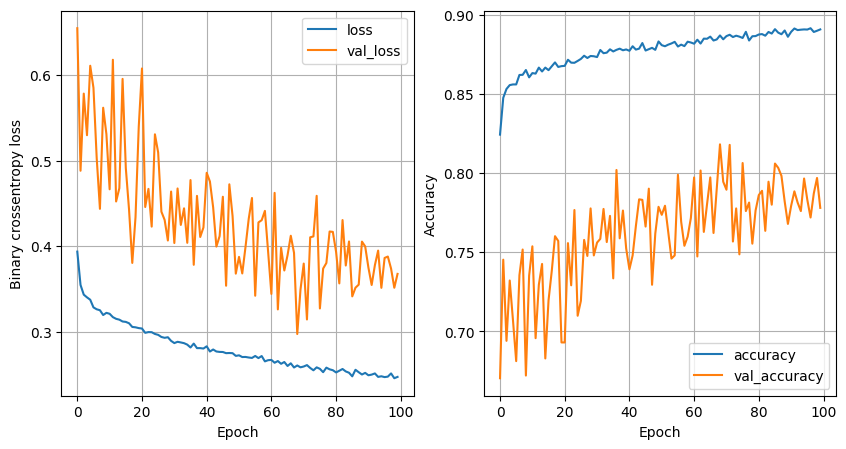

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8634 - loss: 0.3761
Training model with 32 nodes, dropout=0, learning rate=0.01, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7870 - loss: 0.4544 - val_accuracy: 0.7136 - val_loss: 0.5809
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8499 - loss: 0.3548 - val_accuracy: 0.6822 - val_loss: 0.5922
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8492 - loss: 0.3493 - val_accuracy: 0.6292 - val_loss: 0.6876
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8538 - loss: 0.3313 - val_accuracy: 0.7068 - val_loss: 0.5434
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8607 - loss: 0.3329 - val_accuracy: 0.7517 - val_loss: 0.4647
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8607 - loss: 0.3244 - val_accuracy: 0.6991 - val_loss: 0.5299
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8610 - lo

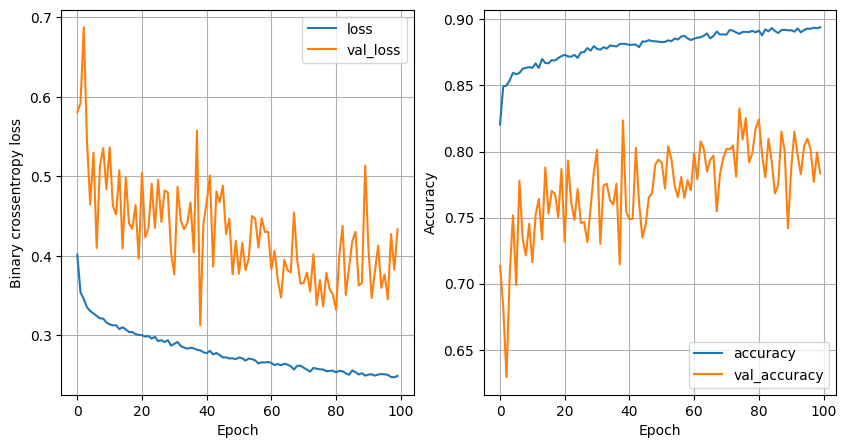

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.3522
Training model with 32 nodes, dropout=0, learning rate=0.01, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7864 - loss: 0.4655 - val_accuracy: 0.6926 - val_loss: 0.6065
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8404 - loss: 0.3643 - val_accuracy: 0.6586 - val_loss: 0.6642
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8481 - loss: 0.3535 - val_accuracy: 0.7308 - val_loss: 0.5084
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8496 - loss: 0.3408 - val_accuracy: 0.7507 - val_loss: 0.4678
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8599 - loss: 0.3271 - val_accuracy: 0.6872 - val_loss: 0.5652
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8654 - loss: 0.3196 - val_accuracy: 0.7594 - val_loss: 0.4280
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8603 - loss: 0.3209 - 

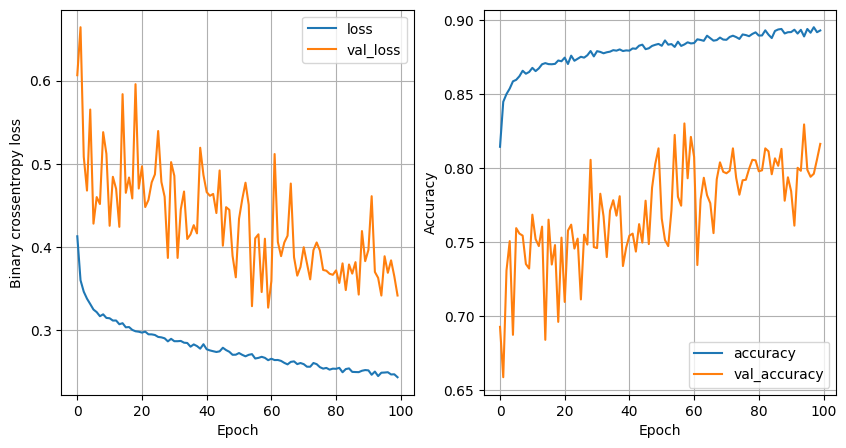

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8734 - loss: 0.3741
Training model with 32 nodes, dropout=0, learning rate=0.005, batch size=32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7916 - loss: 0.4563 - val_accuracy: 0.6839 - val_loss: 0.6185
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8445 - loss: 0.3622 - val_accuracy: 0.7669 - val_loss: 0.4841
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8541 - loss: 0.3432 - val_accuracy: 0.7719 - val_loss: 0.4315
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8594 - loss: 0.3354 - val_accuracy: 0.7517 - val_loss: 0.4823
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8591 - loss: 0.3301 - val_accuracy: 0.7250 - val_loss: 0.5218
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8597 - loss: 0.3228 - val_accuracy: 0.7072 - val_loss: 0.5603
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8676 - l

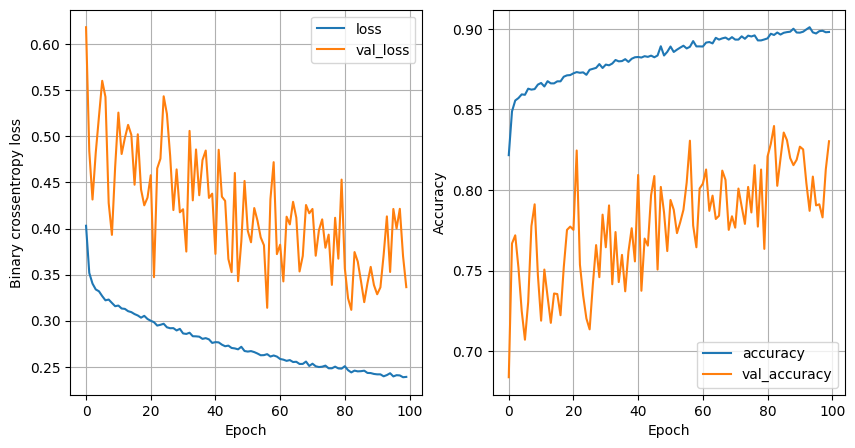

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8641 - loss: 0.3553
Training model with 32 nodes, dropout=0, learning rate=0.005, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7450 - loss: 0.4960 - val_accuracy: 0.7163 - val_loss: 0.5734
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8440 - loss: 0.3617 - val_accuracy: 0.7348 - val_loss: 0.5464
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8491 - loss: 0.3451 - val_accuracy: 0.7213 - val_loss: 0.5339
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8591 - loss: 0.3371 - val_accuracy: 0.7142 - val_loss: 0.5423
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8618 - loss: 0.3282 - val_accuracy: 0.7628 - val_loss: 0.4537
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8588 - loss: 0.3254 - val_accuracy: 0.7517 - val_loss: 0.4719
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8625 - l

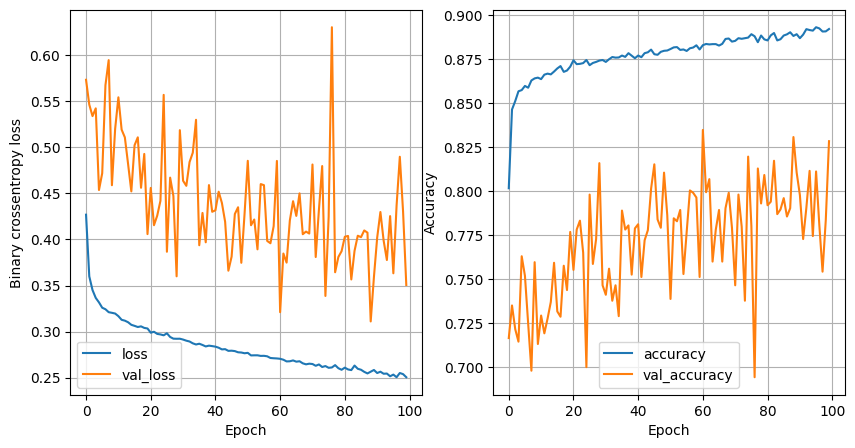

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8634 - loss: 0.3604
Training model with 32 nodes, dropout=0, learning rate=0.005, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7858 - loss: 0.4815 - val_accuracy: 0.7031 - val_loss: 0.5928
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8373 - loss: 0.3727 - val_accuracy: 0.7490 - val_loss: 0.4923
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8477 - loss: 0.3480 - val_accuracy: 0.6984 - val_loss: 0.5637
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8550 - loss: 0.3456 - val_accuracy: 0.6953 - val_loss: 0.5952
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8574 - loss: 0.3383 - val_accuracy: 0.7129 - val_loss: 0.5194
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8637 - loss: 0.3260 - val_accuracy: 0.7230 - val_loss: 0.5253
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8670 - loss: 0.3187 -

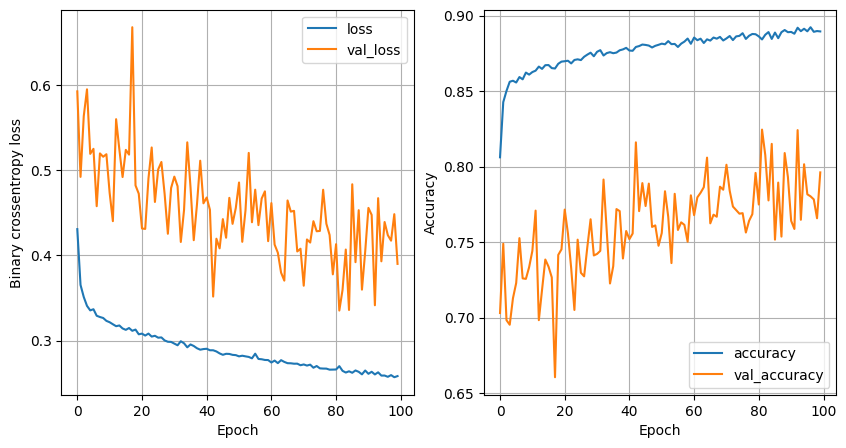

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8734 - loss: 0.3313
Training model with 32 nodes, dropout=0, learning rate=0.001, batch size=32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7578 - loss: 0.5307 - val_accuracy: 0.6137 - val_loss: 0.6944
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8268 - loss: 0.3933 - val_accuracy: 0.7365 - val_loss: 0.5259
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8407 - loss: 0.3656 - val_accuracy: 0.7230 - val_loss: 0.5507
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8501 - loss: 0.3546 - val_accuracy: 0.6818 - val_loss: 0.6212
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8499 - loss: 0.3449 - val_accuracy: 0.7277 - val_loss: 0.5477
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8530 - loss: 0.3416 - val_accuracy: 0.7395 - val_loss: 0.5028
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8529 - l

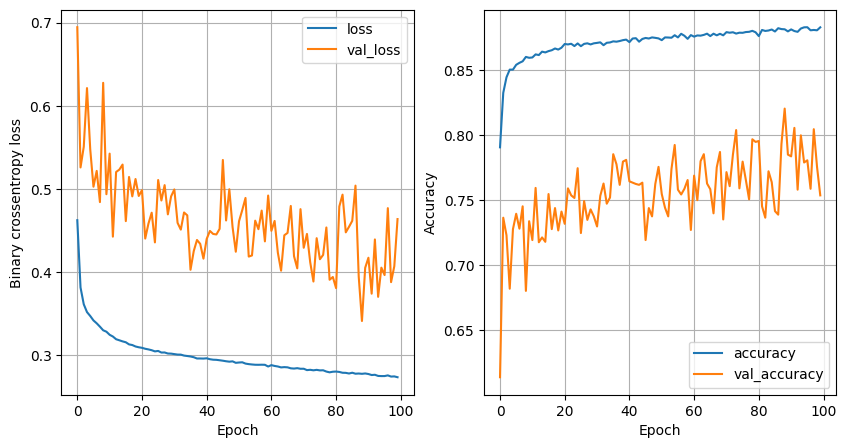

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8660 - loss: 0.3181
Training model with 32 nodes, dropout=0, learning rate=0.001, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6600 - loss: 0.6022 - val_accuracy: 0.6495 - val_loss: 0.6312
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8156 - loss: 0.4011 - val_accuracy: 0.7186 - val_loss: 0.5303
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8440 - loss: 0.3669 - val_accuracy: 0.6903 - val_loss: 0.5787
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8475 - loss: 0.3598 - val_accuracy: 0.7264 - val_loss: 0.5469
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8487 - loss: 0.3495 - val_accuracy: 0.7149 - val_loss: 0.5526
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8491 - loss: 0.3520 - val_accuracy: 0.7513 - val_loss: 0.4987
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8597 - l

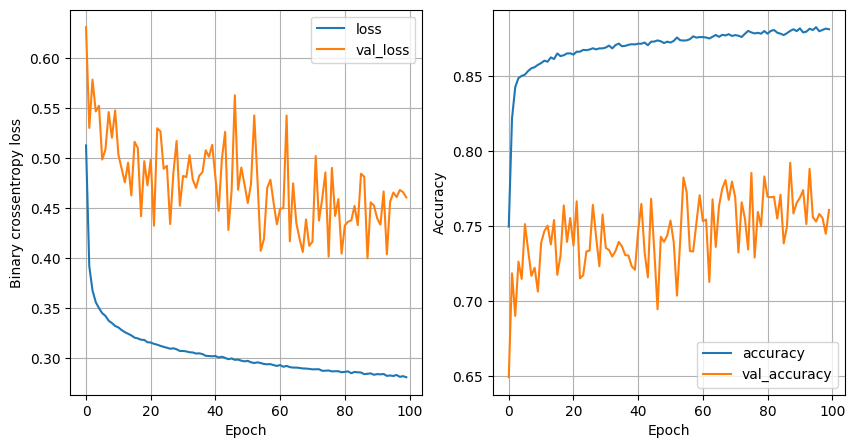

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8716 - loss: 0.3127
Training model with 32 nodes, dropout=0, learning rate=0.001, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6906 - loss: 0.6105 - val_accuracy: 0.5992 - val_loss: 0.6672
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7993 - loss: 0.4431 - val_accuracy: 0.6289 - val_loss: 0.6338
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8208 - loss: 0.4036 - val_accuracy: 0.6913 - val_loss: 0.5730
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8290 - loss: 0.3890 - val_accuracy: 0.6916 - val_loss: 0.5962
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8368 - loss: 0.3771 - val_accuracy: 0.6818 - val_loss: 0.6141
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8411 - loss: 0.3703 - val_accuracy: 0.7368 - val_loss: 0.5275
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8460 - loss: 0.3589 -

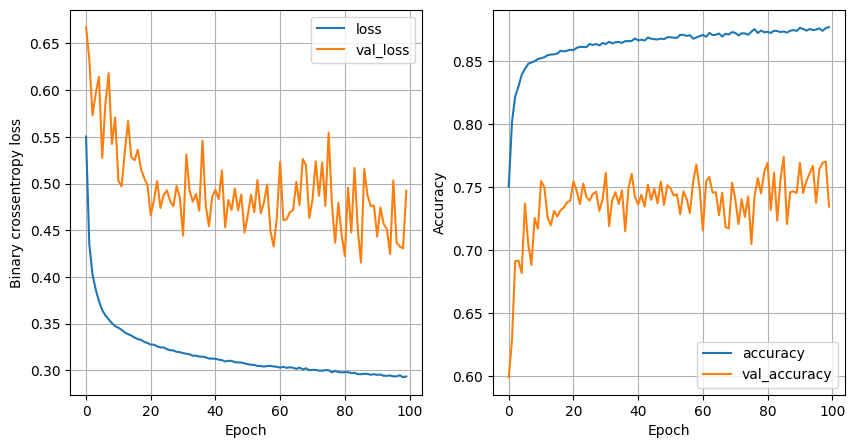

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8679 - loss: 0.3092
Training model with 32 nodes, dropout=0.2, learning rate=0.01, batch size=32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7951 - loss: 0.4558 - val_accuracy: 0.6677 - val_loss: 0.6137
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8424 - loss: 0.3762 - val_accuracy: 0.7659 - val_loss: 0.4458
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8386 - loss: 0.3682 - val_accuracy: 0.7507 - val_loss: 0.4710
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8409 - loss: 0.3619 - val_accuracy: 0.7382 - val_loss: 0.4599
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8594 - loss: 0.3392 - val_accuracy: 0.7594 - val_loss: 0.4203
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8514 - loss: 0.3474 - val_accuracy: 0.6798 - val_loss: 0.5560
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8495 - 

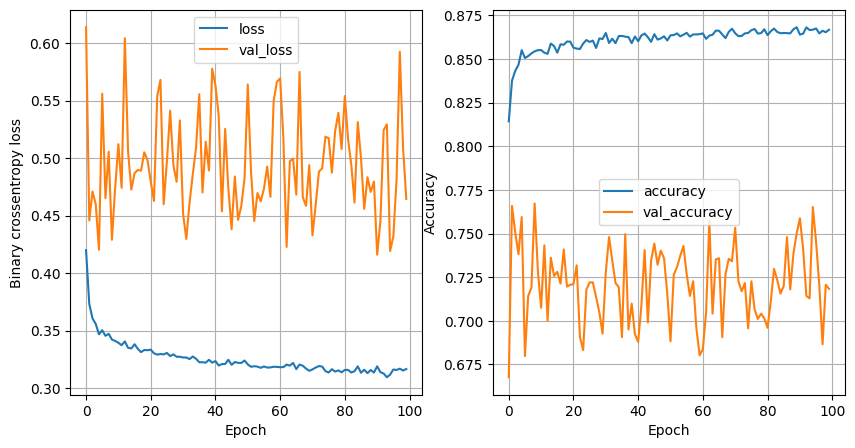

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8686 - loss: 0.3206
Training model with 32 nodes, dropout=0.2, learning rate=0.01, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7765 - loss: 0.4748 - val_accuracy: 0.7294 - val_loss: 0.5025
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8394 - loss: 0.3846 - val_accuracy: 0.6704 - val_loss: 0.5660
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8445 - loss: 0.3685 - val_accuracy: 0.7358 - val_loss: 0.4880
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8471 - loss: 0.3627 - val_accuracy: 0.7038 - val_loss: 0.5031
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8449 - loss: 0.3560 - val_accuracy: 0.6252 - val_loss: 0.7221
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8489 - loss: 0.3515 - val_accuracy: 0.7078 - val_loss: 0.5061
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8560 - 

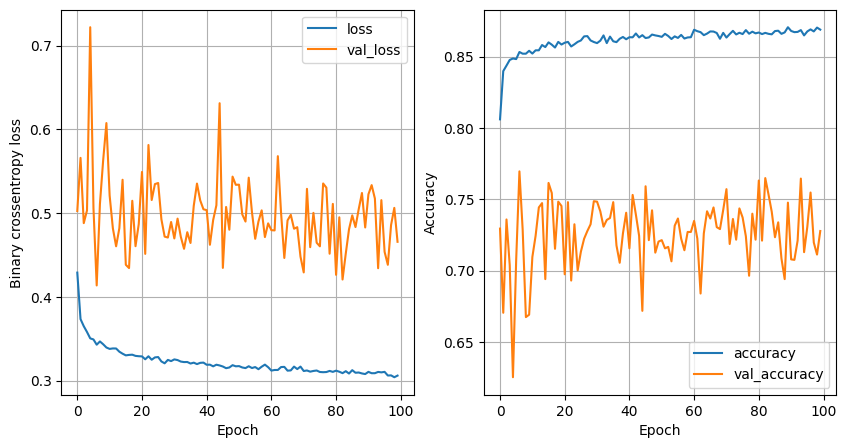

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8700 - loss: 0.3152
Training model with 32 nodes, dropout=0.2, learning rate=0.01, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7542 - loss: 0.4988 - val_accuracy: 0.6808 - val_loss: 0.5866
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8315 - loss: 0.3886 - val_accuracy: 0.7122 - val_loss: 0.5189
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8398 - loss: 0.3723 - val_accuracy: 0.6812 - val_loss: 0.6048
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8464 - loss: 0.3584 - val_accuracy: 0.6832 - val_loss: 0.6335
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8451 - loss: 0.3581 - val_accuracy: 0.7203 - val_loss: 0.5544
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8511 - loss: 0.3498 - val_accuracy: 0.7510 - val_loss: 0.4711
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8516 - loss: 0.3434 

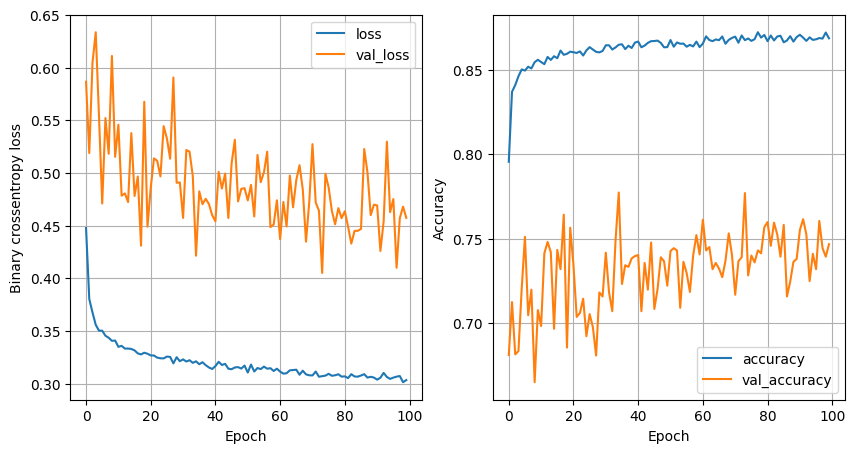

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8744 - loss: 0.3111
Training model with 32 nodes, dropout=0.2, learning rate=0.005, batch size=32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7688 - loss: 0.4826 - val_accuracy: 0.7031 - val_loss: 0.5506
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8406 - loss: 0.3734 - val_accuracy: 0.6970 - val_loss: 0.5989
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8474 - loss: 0.3654 - val_accuracy: 0.7072 - val_loss: 0.5793
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8428 - loss: 0.3672 - val_accuracy: 0.7126 - val_loss: 0.5423
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8518 - loss: 0.3487 - val_accuracy: 0.7493 - val_loss: 0.4567
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8448 - loss: 0.3560 - val_accuracy: 0.7122 - val_loss: 0.5160
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8514 -

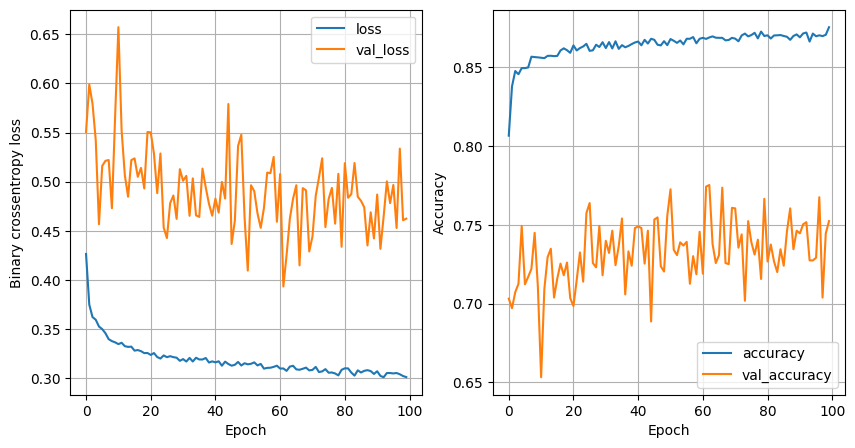

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8689 - loss: 0.3136
Training model with 32 nodes, dropout=0.2, learning rate=0.005, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7564 - loss: 0.5083 - val_accuracy: 0.6717 - val_loss: 0.5904
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8249 - loss: 0.3954 - val_accuracy: 0.7227 - val_loss: 0.5305
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8447 - loss: 0.3622 - val_accuracy: 0.7068 - val_loss: 0.5366
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8442 - loss: 0.3586 - val_accuracy: 0.6785 - val_loss: 0.5538
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8441 - loss: 0.3570 - val_accuracy: 0.7389 - val_loss: 0.4806
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8479 - loss: 0.3447 - val_accuracy: 0.7368 - val_loss: 0.4895
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8491 -

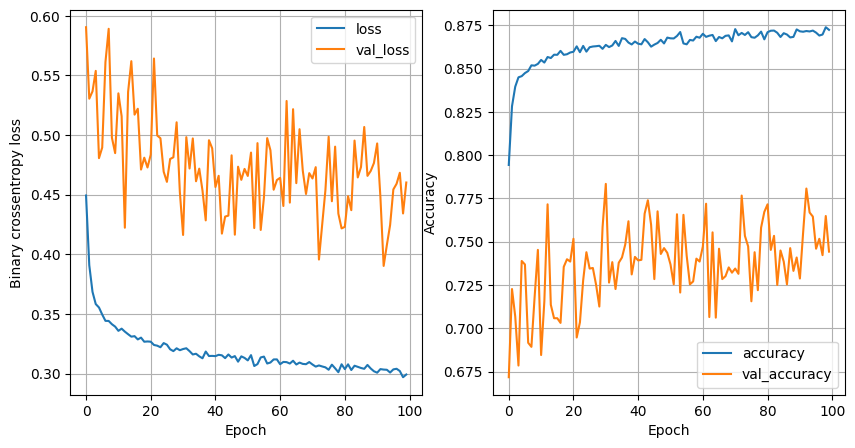

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8723 - loss: 0.3107
Training model with 32 nodes, dropout=0.2, learning rate=0.005, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7354 - loss: 0.5226 - val_accuracy: 0.6775 - val_loss: 0.6150
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8218 - loss: 0.4018 - val_accuracy: 0.7524 - val_loss: 0.4868
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8373 - loss: 0.3840 - val_accuracy: 0.7166 - val_loss: 0.5264
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8413 - loss: 0.3664 - val_accuracy: 0.7594 - val_loss: 0.4757
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8459 - loss: 0.3552 - val_accuracy: 0.7365 - val_loss: 0.4902
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8453 - loss: 0.3496 - val_accuracy: 0.7088 - val_loss: 0.5485
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8524 - loss: 0.3460

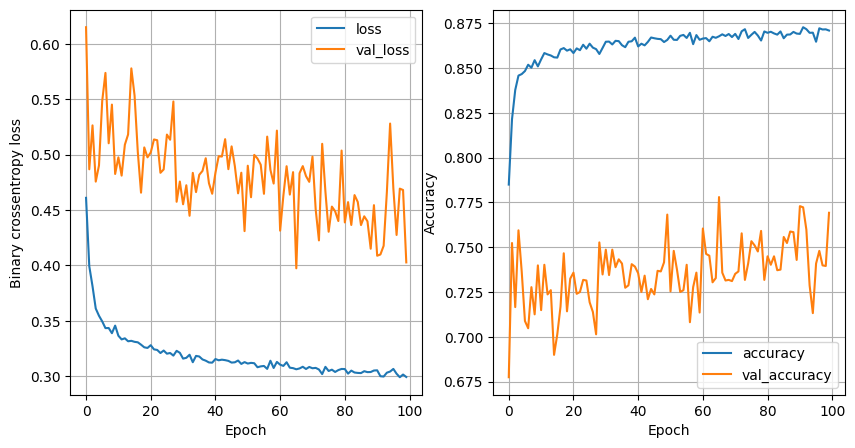

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.3104
Training model with 32 nodes, dropout=0.2, learning rate=0.001, batch size=32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7069 - loss: 0.5583 - val_accuracy: 0.6201 - val_loss: 0.6534
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8050 - loss: 0.4267 - val_accuracy: 0.6711 - val_loss: 0.6131
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8252 - loss: 0.3990 - val_accuracy: 0.6876 - val_loss: 0.5915
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8286 - loss: 0.3851 - val_accuracy: 0.7051 - val_loss: 0.5619
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8405 - loss: 0.3787 - val_accuracy: 0.6896 - val_loss: 0.5999
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8427 - loss: 0.3708 - val_accuracy: 0.7206 - val_loss: 0.5288
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8418 -

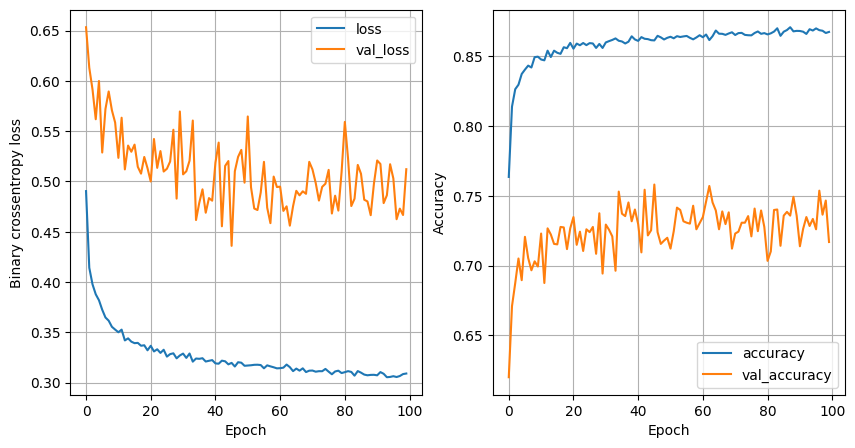

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8698 - loss: 0.3067
Training model with 32 nodes, dropout=0.2, learning rate=0.001, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6920 - loss: 0.5849 - val_accuracy: 0.6174 - val_loss: 0.6664
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8017 - loss: 0.4324 - val_accuracy: 0.6461 - val_loss: 0.6561
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8249 - loss: 0.3978 - val_accuracy: 0.6876 - val_loss: 0.5948
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8272 - loss: 0.3960 - val_accuracy: 0.6906 - val_loss: 0.6034
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8334 - loss: 0.3863 - val_accuracy: 0.7142 - val_loss: 0.5657
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8365 - loss: 0.3743 - val_accuracy: 0.7136 - val_loss: 0.5644
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8362 -

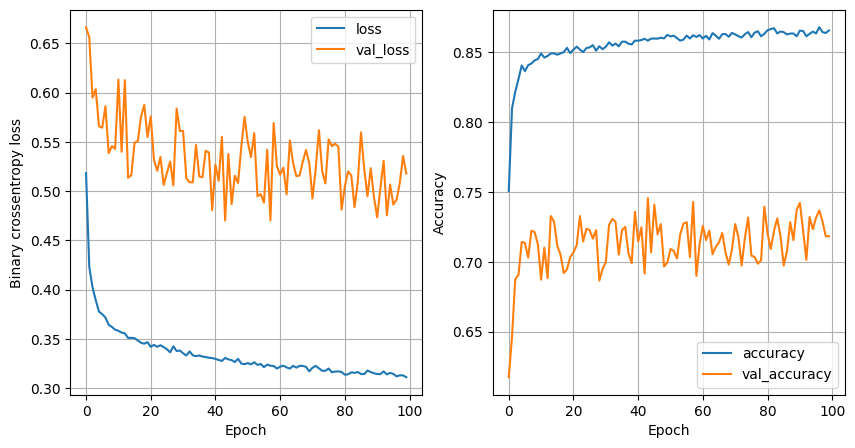

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8659 - loss: 0.3123
Training model with 32 nodes, dropout=0.2, learning rate=0.001, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6867 - loss: 0.6205 - val_accuracy: 0.5678 - val_loss: 0.7037
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7812 - loss: 0.4706 - val_accuracy: 0.6198 - val_loss: 0.6624
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7924 - loss: 0.4376 - val_accuracy: 0.6525 - val_loss: 0.6173
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8056 - loss: 0.4221 - val_accuracy: 0.6660 - val_loss: 0.6204
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8127 - loss: 0.4140 - val_accuracy: 0.6673 - val_loss: 0.6288
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8175 - loss: 0.4052 - val_accuracy: 0.6741 - val_loss: 0.6129
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8197 - loss: 0.4072

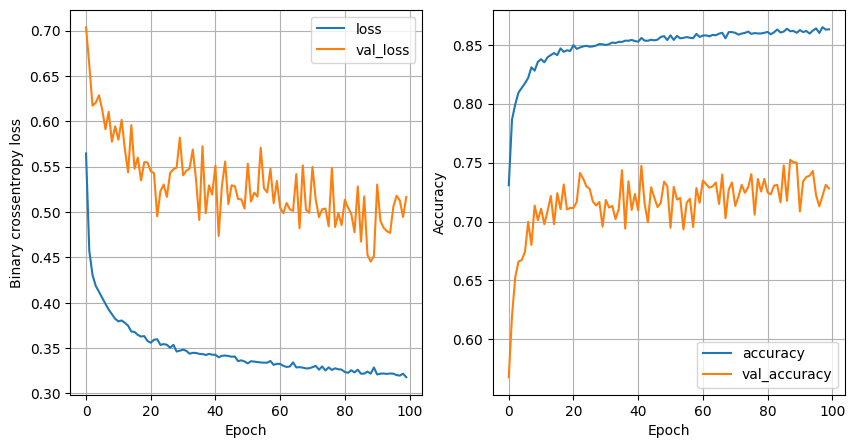

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8728 - loss: 0.3098
Training model with 64 nodes, dropout=0, learning rate=0.01, batch size=32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8082 - loss: 0.4319 - val_accuracy: 0.6623 - val_loss: 0.6302
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8478 - loss: 0.3548 - val_accuracy: 0.6738 - val_loss: 0.5425
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8513 - loss: 0.3465 - val_accuracy: 0.6471 - val_loss: 0.6014
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8516 - loss: 0.3431 - val_accuracy: 0.6994 - val_loss: 0.5696
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8580 - loss: 0.3311 - val_accuracy: 0.7466 - val_loss: 0.4544
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8584 - loss: 0.3335 - val_accuracy: 0.7345 - val_loss: 0.4900
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8614 - lo

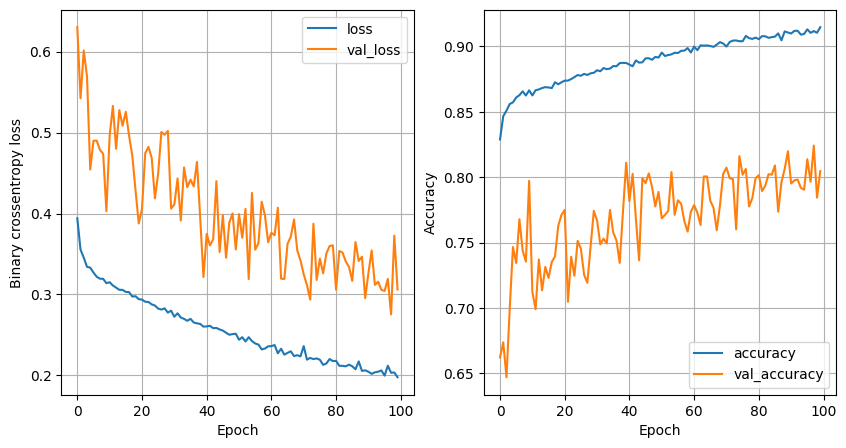

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8492 - loss: 0.5907
Training model with 64 nodes, dropout=0, learning rate=0.01, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7943 - loss: 0.4357 - val_accuracy: 0.7210 - val_loss: 0.5318
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8575 - loss: 0.3515 - val_accuracy: 0.7051 - val_loss: 0.5192
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8525 - loss: 0.3429 - val_accuracy: 0.6778 - val_loss: 0.5773
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8578 - loss: 0.3375 - val_accuracy: 0.7274 - val_loss: 0.5386
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8556 - loss: 0.3354 - val_accuracy: 0.7702 - val_loss: 0.4260
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8608 - loss: 0.3293 - val_accuracy: 0.7206 - val_loss: 0.4989
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8613 - lo

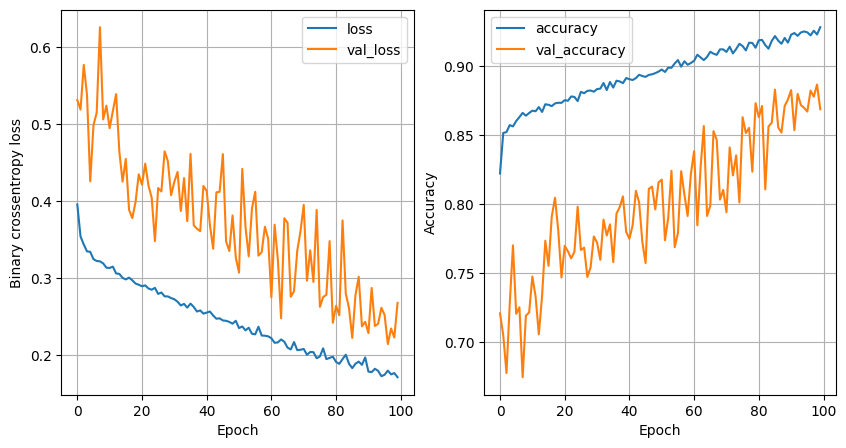

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8503 - loss: 0.6014
Training model with 64 nodes, dropout=0, learning rate=0.01, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7813 - loss: 0.4448 - val_accuracy: 0.7156 - val_loss: 0.5753
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8468 - loss: 0.3559 - val_accuracy: 0.6427 - val_loss: 0.5906
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8562 - loss: 0.3412 - val_accuracy: 0.7233 - val_loss: 0.5026
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8586 - loss: 0.3305 - val_accuracy: 0.7331 - val_loss: 0.5029
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8573 - loss: 0.3333 - val_accuracy: 0.7578 - val_loss: 0.4887
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8607 - loss: 0.3223 - val_accuracy: 0.7139 - val_loss: 0.5218
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8626 - loss: 0.3145 - 

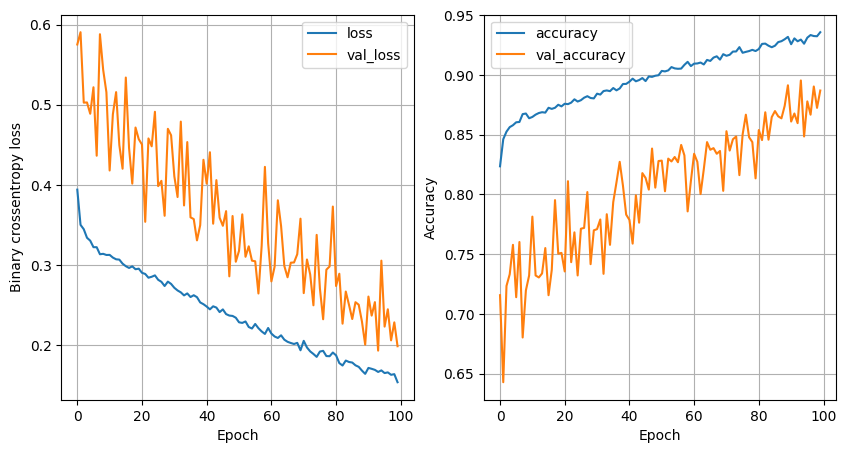

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8526 - loss: 0.6053
Training model with 64 nodes, dropout=0, learning rate=0.005, batch size=32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7977 - loss: 0.4453 - val_accuracy: 0.7935 - val_loss: 0.4226
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8468 - loss: 0.3554 - val_accuracy: 0.6930 - val_loss: 0.5125
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8515 - loss: 0.3392 - val_accuracy: 0.6812 - val_loss: 0.6263
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8588 - loss: 0.3289 - val_accuracy: 0.7186 - val_loss: 0.5265
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8607 - loss: 0.3205 - val_accuracy: 0.6744 - val_loss: 0.5910
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8563 - loss: 0.3228 - val_accuracy: 0.6950 - val_loss: 0.5505
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8592 - l

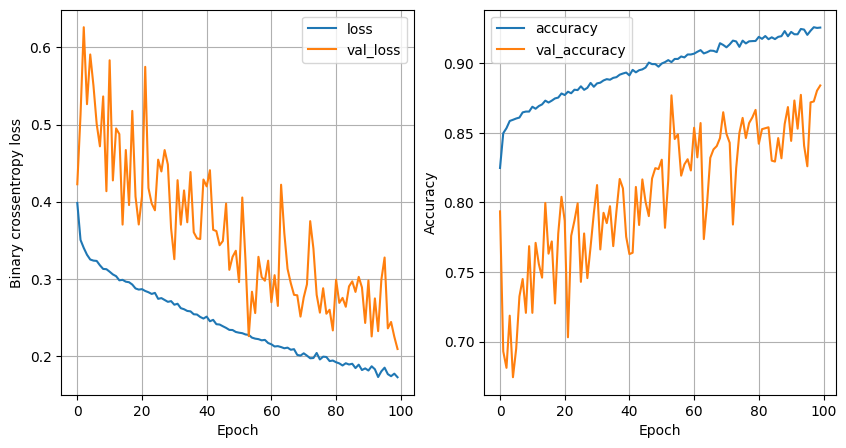

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8566 - loss: 0.5427
Training model with 64 nodes, dropout=0, learning rate=0.005, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7818 - loss: 0.4594 - val_accuracy: 0.7230 - val_loss: 0.5222
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8445 - loss: 0.3588 - val_accuracy: 0.6980 - val_loss: 0.5465
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8569 - loss: 0.3313 - val_accuracy: 0.6599 - val_loss: 0.6202
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8576 - loss: 0.3340 - val_accuracy: 0.7740 - val_loss: 0.4381
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8570 - loss: 0.3331 - val_accuracy: 0.6505 - val_loss: 0.6181
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8576 - loss: 0.3295 - val_accuracy: 0.7250 - val_loss: 0.5142
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8670 - l

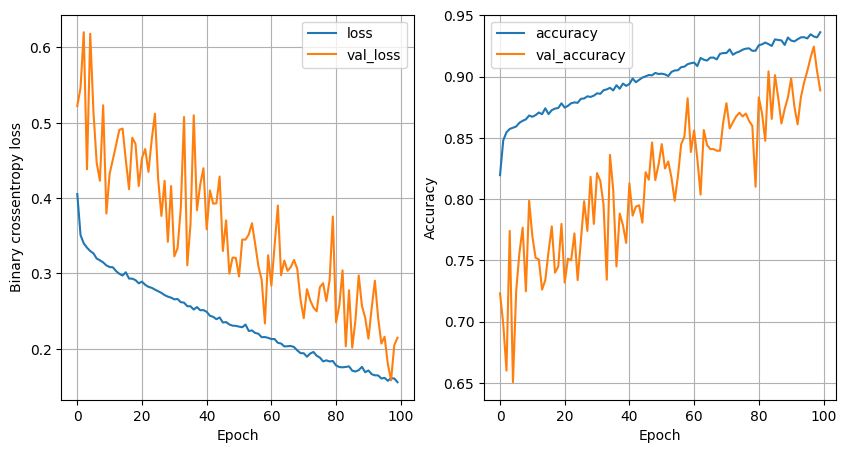

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8617 - loss: 0.5181
Training model with 64 nodes, dropout=0, learning rate=0.005, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7930 - loss: 0.4627 - val_accuracy: 0.6714 - val_loss: 0.6600
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8441 - loss: 0.3652 - val_accuracy: 0.7146 - val_loss: 0.6043
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8469 - loss: 0.3467 - val_accuracy: 0.7092 - val_loss: 0.5546
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8546 - loss: 0.3365 - val_accuracy: 0.6751 - val_loss: 0.5811
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8607 - loss: 0.3229 - val_accuracy: 0.6768 - val_loss: 0.6248
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8572 - loss: 0.3218 - val_accuracy: 0.7362 - val_loss: 0.5337
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8618 - loss: 0.3205 -

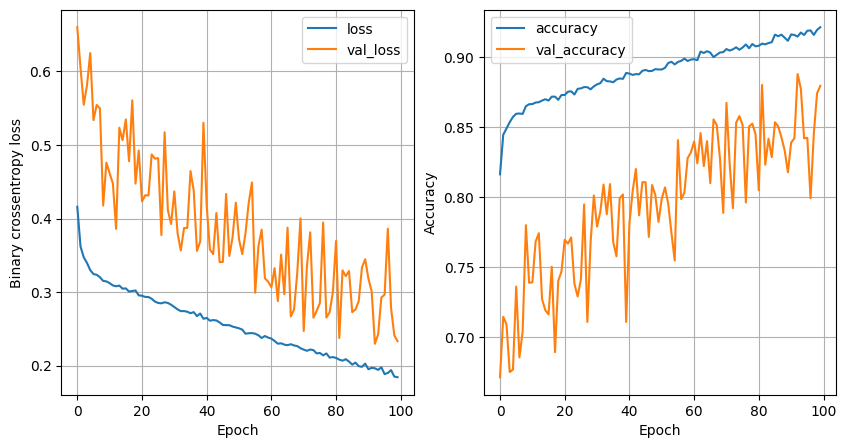

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8573 - loss: 0.4410
Training model with 64 nodes, dropout=0, learning rate=0.001, batch size=32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7620 - loss: 0.5092 - val_accuracy: 0.6761 - val_loss: 0.6250
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8407 - loss: 0.3735 - val_accuracy: 0.7210 - val_loss: 0.5541
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8514 - loss: 0.3553 - val_accuracy: 0.7041 - val_loss: 0.5988
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8585 - loss: 0.3384 - val_accuracy: 0.7088 - val_loss: 0.5674
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8583 - loss: 0.3339 - val_accuracy: 0.7901 - val_loss: 0.4038
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8580 - loss: 0.3364 - val_accuracy: 0.6694 - val_loss: 0.6322
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8611 - l

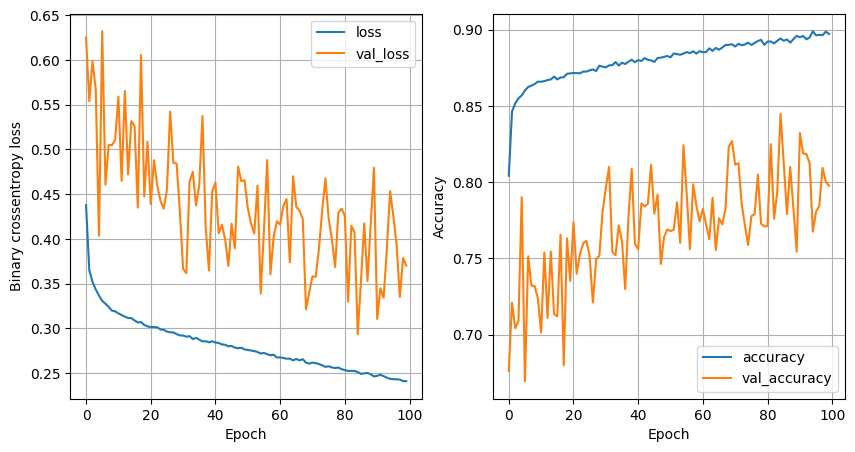

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8713 - loss: 0.3380
Training model with 64 nodes, dropout=0, learning rate=0.001, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7595 - loss: 0.5206 - val_accuracy: 0.6670 - val_loss: 0.6067
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8379 - loss: 0.3799 - val_accuracy: 0.7176 - val_loss: 0.5519
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8466 - loss: 0.3634 - val_accuracy: 0.7018 - val_loss: 0.5888
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8584 - loss: 0.3414 - val_accuracy: 0.7365 - val_loss: 0.5278
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8576 - loss: 0.3387 - val_accuracy: 0.7281 - val_loss: 0.5282
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8549 - loss: 0.3371 - val_accuracy: 0.7328 - val_loss: 0.5161
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8573 - l

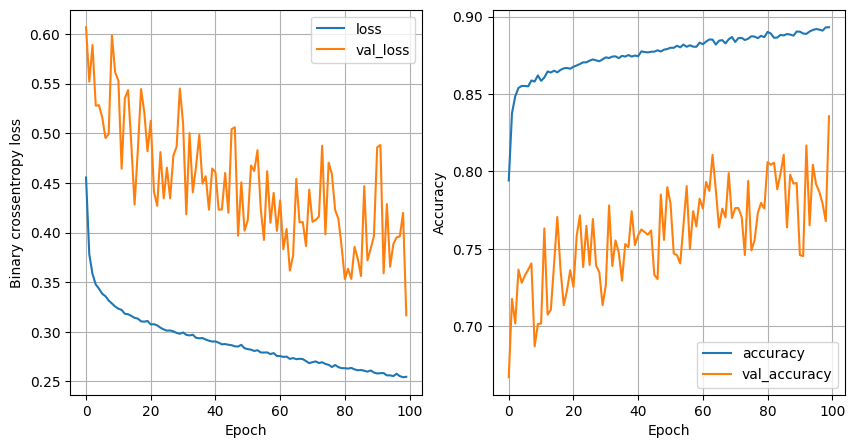

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8638 - loss: 0.3276
Training model with 64 nodes, dropout=0, learning rate=0.001, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6765 - loss: 0.6014 - val_accuracy: 0.6147 - val_loss: 0.6547
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8197 - loss: 0.4010 - val_accuracy: 0.6805 - val_loss: 0.5993
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8399 - loss: 0.3756 - val_accuracy: 0.7007 - val_loss: 0.5871
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8474 - loss: 0.3603 - val_accuracy: 0.7510 - val_loss: 0.4897
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8572 - loss: 0.3459 - val_accuracy: 0.6775 - val_loss: 0.6242
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8504 - loss: 0.3502 - val_accuracy: 0.7250 - val_loss: 0.5546
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8551 - loss: 0.3446 -

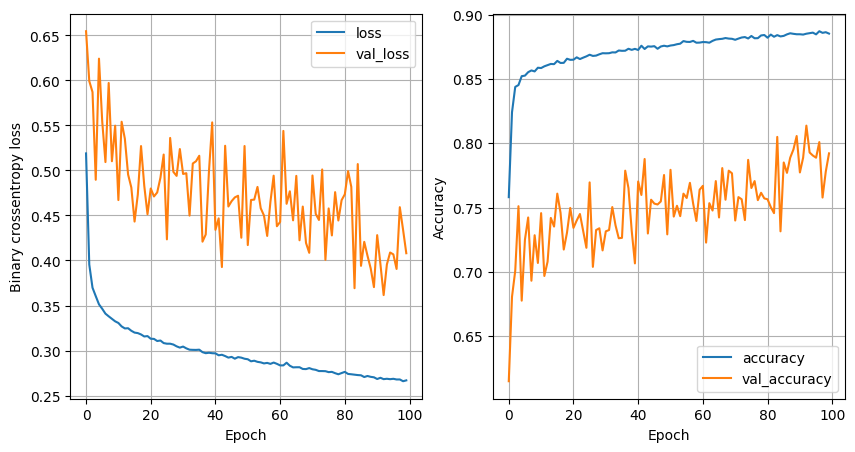

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8726 - loss: 0.3174
Training model with 64 nodes, dropout=0.2, learning rate=0.01, batch size=32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7991 - loss: 0.4441 - val_accuracy: 0.7375 - val_loss: 0.4735
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8459 - loss: 0.3652 - val_accuracy: 0.7314 - val_loss: 0.4713
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8452 - loss: 0.3625 - val_accuracy: 0.7345 - val_loss: 0.5049
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8487 - loss: 0.3507 - val_accuracy: 0.6916 - val_loss: 0.5355
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8517 - loss: 0.3438 - val_accuracy: 0.7264 - val_loss: 0.5435
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8490 - loss: 0.3447 - val_accuracy: 0.7429 - val_loss: 0.4743
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8571 - 

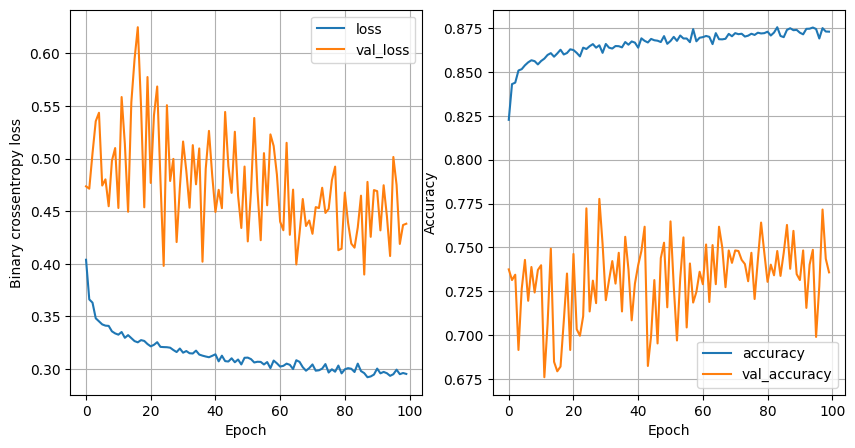

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8670 - loss: 0.3183
Training model with 64 nodes, dropout=0.2, learning rate=0.01, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7885 - loss: 0.4548 - val_accuracy: 0.6953 - val_loss: 0.5205
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8415 - loss: 0.3715 - val_accuracy: 0.7460 - val_loss: 0.4464
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8425 - loss: 0.3536 - val_accuracy: 0.6518 - val_loss: 0.6428
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8448 - loss: 0.3577 - val_accuracy: 0.7294 - val_loss: 0.5017
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8518 - loss: 0.3409 - val_accuracy: 0.7260 - val_loss: 0.5172
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8533 - loss: 0.3433 - val_accuracy: 0.7082 - val_loss: 0.5460
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8597 - 

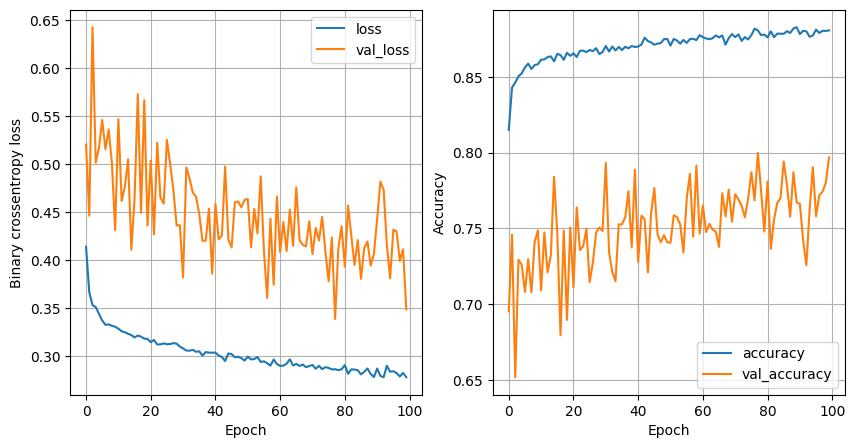

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8655 - loss: 0.3408
Training model with 64 nodes, dropout=0.2, learning rate=0.01, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7836 - loss: 0.4651 - val_accuracy: 0.7298 - val_loss: 0.5134
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8403 - loss: 0.3753 - val_accuracy: 0.7149 - val_loss: 0.5390
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8461 - loss: 0.3519 - val_accuracy: 0.7136 - val_loss: 0.5396
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8524 - loss: 0.3450 - val_accuracy: 0.7281 - val_loss: 0.5143
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8514 - loss: 0.3455 - val_accuracy: 0.6835 - val_loss: 0.5413
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8580 - loss: 0.3374 - val_accuracy: 0.7247 - val_loss: 0.5121
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8526 - loss: 0.3385

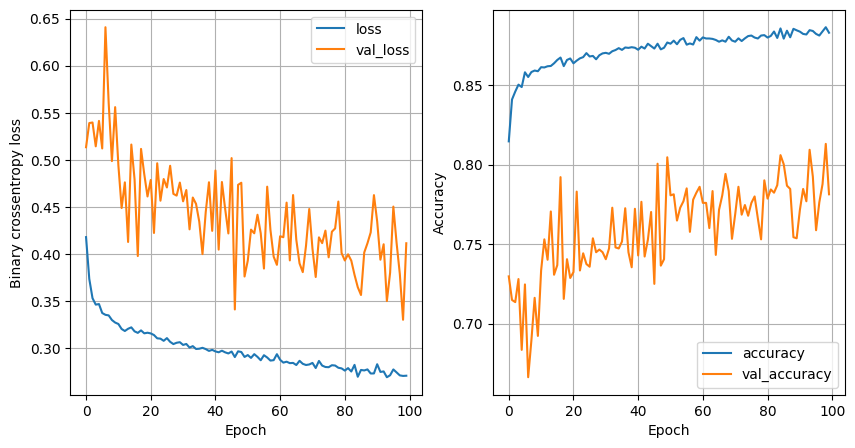

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8694 - loss: 0.3214
Training model with 64 nodes, dropout=0.2, learning rate=0.005, batch size=32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7886 - loss: 0.4534 - val_accuracy: 0.6576 - val_loss: 0.6626
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8444 - loss: 0.3702 - val_accuracy: 0.7331 - val_loss: 0.4958
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8506 - loss: 0.3520 - val_accuracy: 0.6576 - val_loss: 0.6192
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8489 - loss: 0.3580 - val_accuracy: 0.6765 - val_loss: 0.6408
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8552 - loss: 0.3374 - val_accuracy: 0.6748 - val_loss: 0.5639
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8636 - loss: 0.3264 - val_accuracy: 0.7399 - val_loss: 0.4792
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8566 -

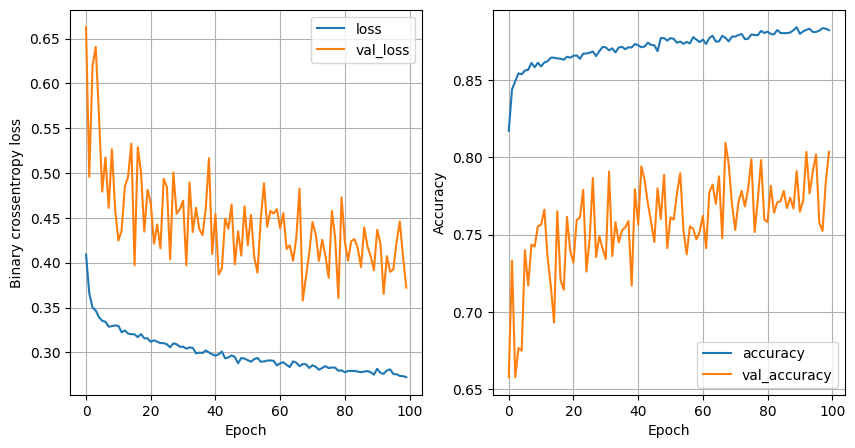

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8706 - loss: 0.3106
Training model with 64 nodes, dropout=0.2, learning rate=0.005, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7868 - loss: 0.4649 - val_accuracy: 0.7203 - val_loss: 0.5456
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8347 - loss: 0.3784 - val_accuracy: 0.7642 - val_loss: 0.4582
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8484 - loss: 0.3594 - val_accuracy: 0.7213 - val_loss: 0.5105
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8529 - loss: 0.3472 - val_accuracy: 0.7409 - val_loss: 0.4899
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8519 - loss: 0.3433 - val_accuracy: 0.7112 - val_loss: 0.5388
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8469 - loss: 0.3478 - val_accuracy: 0.6825 - val_loss: 0.5889
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8547 -

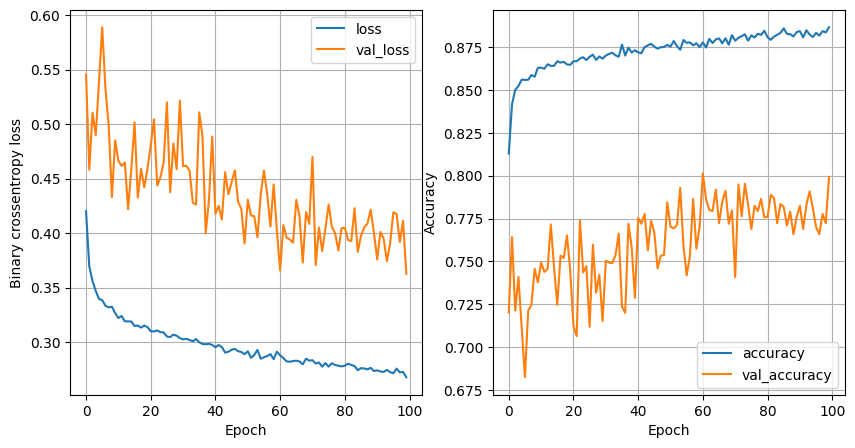

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8629 - loss: 0.3331
Training model with 64 nodes, dropout=0.2, learning rate=0.005, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7516 - loss: 0.5033 - val_accuracy: 0.6677 - val_loss: 0.5992
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8280 - loss: 0.3937 - val_accuracy: 0.7382 - val_loss: 0.4929
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8418 - loss: 0.3705 - val_accuracy: 0.7429 - val_loss: 0.4610
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8521 - loss: 0.3462 - val_accuracy: 0.6903 - val_loss: 0.5859
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8562 - loss: 0.3419 - val_accuracy: 0.7220 - val_loss: 0.5310
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8507 - loss: 0.3408 - val_accuracy: 0.6933 - val_loss: 0.5698
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8568 - loss: 0.3379

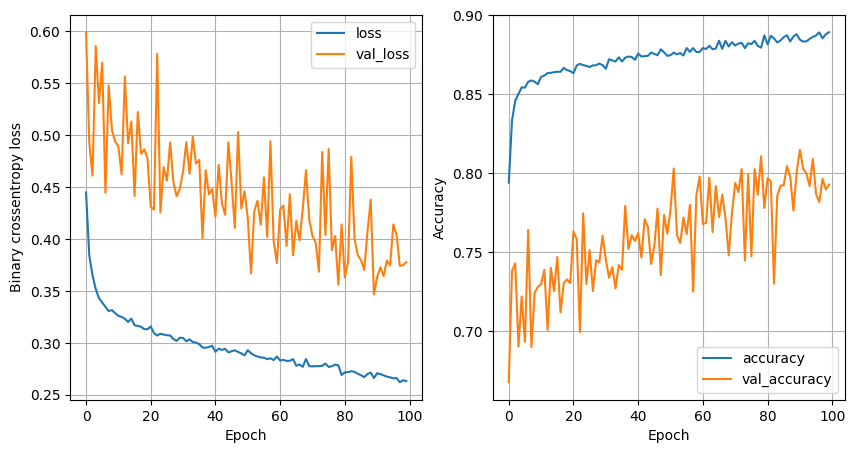

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8741 - loss: 0.3074
Training model with 64 nodes, dropout=0.2, learning rate=0.001, batch size=32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7433 - loss: 0.5201 - val_accuracy: 0.6336 - val_loss: 0.6790
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8297 - loss: 0.3838 - val_accuracy: 0.7149 - val_loss: 0.5302
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8292 - loss: 0.3864 - val_accuracy: 0.7028 - val_loss: 0.5733
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8458 - loss: 0.3614 - val_accuracy: 0.6876 - val_loss: 0.5767
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8542 - loss: 0.3459 - val_accuracy: 0.7227 - val_loss: 0.5172
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8494 - loss: 0.3594 - val_accuracy: 0.7210 - val_loss: 0.5384
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8551 -

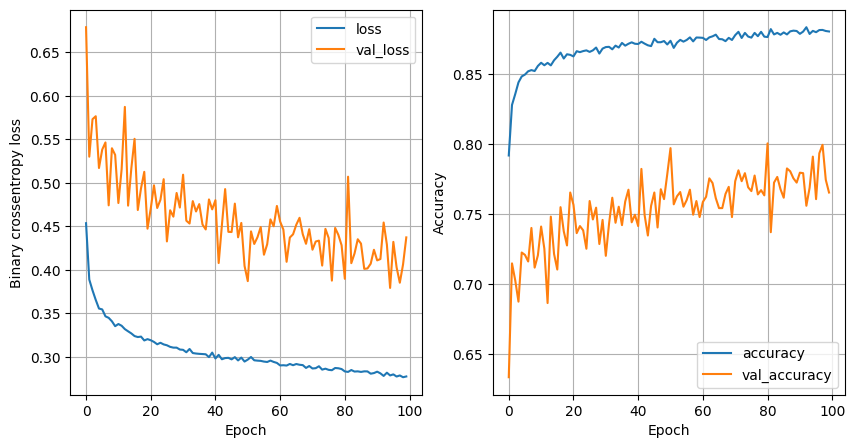

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8755 - loss: 0.3032
Training model with 64 nodes, dropout=0.2, learning rate=0.001, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7347 - loss: 0.5623 - val_accuracy: 0.6545 - val_loss: 0.6171
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8262 - loss: 0.3941 - val_accuracy: 0.6579 - val_loss: 0.6417
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8306 - loss: 0.3970 - val_accuracy: 0.7406 - val_loss: 0.5164
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8425 - loss: 0.3730 - val_accuracy: 0.6869 - val_loss: 0.5951
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8385 - loss: 0.3751 - val_accuracy: 0.7456 - val_loss: 0.5065
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8454 - loss: 0.3529 - val_accuracy: 0.7365 - val_loss: 0.5320
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8463 -

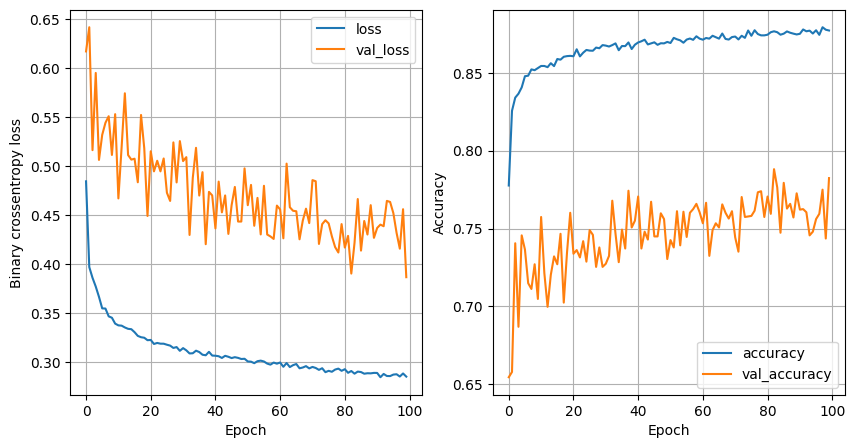

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8724 - loss: 0.3080
Training model with 64 nodes, dropout=0.2, learning rate=0.001, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7340 - loss: 0.5722 - val_accuracy: 0.6299 - val_loss: 0.6545
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8013 - loss: 0.4351 - val_accuracy: 0.6522 - val_loss: 0.6298
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8206 - loss: 0.4040 - val_accuracy: 0.6856 - val_loss: 0.6034
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8291 - loss: 0.3943 - val_accuracy: 0.7072 - val_loss: 0.5595
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8395 - loss: 0.3784 - val_accuracy: 0.6845 - val_loss: 0.6130
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8313 - loss: 0.3887 - val_accuracy: 0.6997 - val_loss: 0.5951
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8358 - loss: 0.377

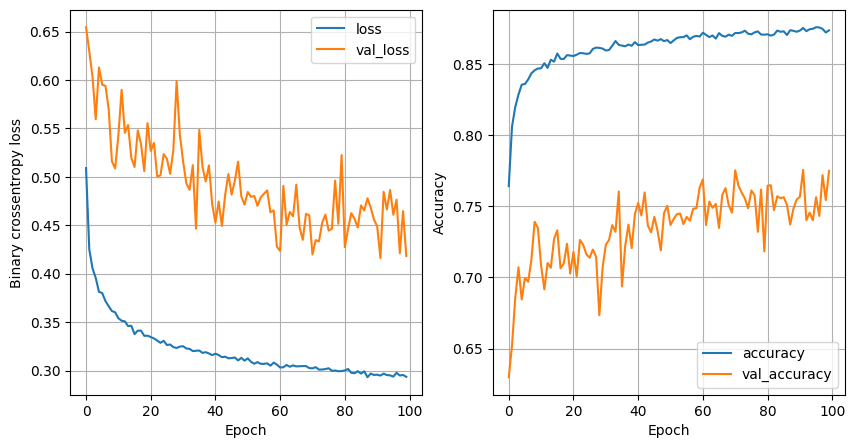

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8802 - loss: 0.2981


In [31]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32,64,128]:
        print(f"Training model with {num_nodes} nodes, dropout={dropout_prob}, learning rate={lr}, batch size={batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss, _ = model.evaluate(x_valid, y_valid)
        if val_loss < least_val_loss:
          least_val_loss=val_loss
          least_loss_model=model

In [32]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test,y_pred))


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1331
           1       0.88      0.93      0.90      2473

    accuracy                           0.87      3804
   macro avg       0.86      0.84      0.85      3804
weighted avg       0.87      0.87      0.86      3804

